<a href="https://colab.research.google.com/github/TUSHAR1992S/Walmart-Confidence-Interval-and-CLT/blob/main/Business_Case_Walmart_Confidence_Interval_and_CLT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

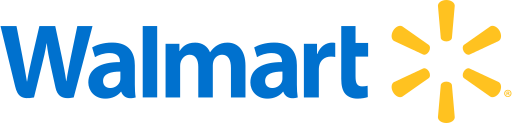

*Image Source: https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Walmart_logo.svg/512px-Walmart_logo.svg.png*
#*Business Case: Walmart - Confidence Interval and CLT*

****
**About Walmart**
****

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

***
**Business Problem**
***
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

***
**Dataset**
***
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
Dataset link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094


    User_ID:	User ID
    Product_ID:	Product ID
    Gender:	Sex of User
    Age:	Age in bins
    Occupation:	Occupation(Masked)
    City_Category:	Category of the City (A,B,C)
    StayInCurrentCityYears:	Number of years stay in current city
    Marital_Status:	Marital Status
    ProductCategory:	Product Category (Masked)
    Purchase:	Purchase Amount


***
Problem Statement
***

*  The Management team at Walmart Inc. wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

Analyze the data and generate insights that could help Walmart Team to:

- analyze the customer purchase behavior (precisely, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
- also provide anlysis and tentative inferances from data to Team to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?


Analytical solution Requirements  
* comprehensive analysis of customer purchase behavior, with a specific focus on purchase amounts, in relation to customer gender during the Black Friday sales event at Walmart Inc.
* suggest valuable insights that can assist the management team at Walmart Inc. in making data-driven decisions.


***
Analysis Summary/Outline (Given)  
***

* Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

* Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)

* Do some data exploration steps like:

  - Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

  - Inference after computing the average female and male expenses.

  - Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

*  Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
  - The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

* Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?

* Perform the same activity for Married vs Unmarried and Age
  -  For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

* Give recommendations and action items to Walmart.

In [1]:
'''
MIT License

Copyright (c) 2024 Tushar Shrivastav

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.'''

'\nMIT License\n\nCopyright (c) 2024 Tushar Shrivastav\n\nPermission is hereby granted, free of charge, to any person obtaining a copy\nof this software and associated documentation files (the "Software"), to deal\nin the Software without restriction, including without limitation the rights\nto use, copy, modify, merge, publish, distribute, sublicense, and/or sell\ncopies of the Software, and to permit persons to whom the Software is\nfurnished to do so, subject to the following conditions:\n\nThe above copyright notice and this permission notice shall be included in all\ncopies or substantial portions of the Software.\n\nTHE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR\nIMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,\nFITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE\nAUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER\nLIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING

In [ ]:
############################################################################

#**Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

In [ ]:
#improting Aerofit trademill dataset
!wget  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

--2024-03-13 14:22:23--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.183, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv.1’

walmart_data.csv.1  100%[===================>]  21.96M  82.5MB/s    in 0.3s    

2024-03-13 14:22:24 (82.5 MB/s) - ‘walmart_data.csv.1’ saved [23027994/23027994]



In [ ]:
#Importing the libraries:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading the dataset
df_raw = pd.read_csv('walmart_data.csv')

In [ ]:
df_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


----
**Data Shape and Basic Charaterstics and Missing Values:**

In [ ]:
Row, Col = df_raw.shape
print('Data shape consist of Row:',Row, 'and Columns:',Col )

Data shape consist of Row: 550068 and Columns: 10


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Key Obsevations:-**
- 10 field /features with lots of mixed alpha numeric data.
- Zero Non Null Value. No missing Values
- Apart from following columns all field/features seems to categorical in nautre:  
  - Stay_In_Current_City_Years:    Number of years stay in current city
  - Purchase:    Purchase Amount

In [ ]:
df_raw['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

- However, the Stay_In_Current_City_Years is already 'object' on lokking the dtata in it found values like 4+ therefore cannot be coverted to numeric data.  

- Hence, goining with conversion of all datatypes to object except Purchase as in amount.

----
Checking Other Data Type

In [ ]:
# checking the unique values for columns
for i in df_raw.columns:
  print('Column:',i,'\nUnique Values:',np.unique(df_raw[i]))
  print('-'*50)

Column: User_ID 
Unique Values: [1000001 1000002 1000003 ... 1006038 1006039 1006040]
--------------------------------------------------
Column: Product_ID 
Unique Values: ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
--------------------------------------------------
Column: Gender 
Unique Values: ['F' 'M']
--------------------------------------------------
Column: Age 
Unique Values: ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
--------------------------------------------------
Column: Occupation 
Unique Values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
--------------------------------------------------
Column: City_Category 
Unique Values: ['A' 'B' 'C']
--------------------------------------------------
Column: Stay_In_Current_City_Years 
Unique Values: ['0' '1' '2' '3' '4+']
--------------------------------------------------
Column: Marital_Status 
Unique Values: [0 1]
--------------------------------------------------
C

**Key Observation**
- Values of Marital Status mentioed is 0 or 1 may be chage to Unmarried or Married.

In [ ]:
df_raw['Marital_Status'] = df_raw['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df_raw['Marital_Status'].unique()

array(['Unmarried', 'Married'], dtype=object)

----

**Changing the Datatype of Columns**

- The above caegorical data can be converted to object using 'str' method
- Using the Pandas special data type method 'category' defining the data due to its use benifits w.r.t. statistical variables field/featurs

Source:
- https://pandas.pydata.org/docs/user_guide/categorical.html
- https://pbpython.com/pandas_dtypes_cat.html


In [ ]:
for i in df_raw.columns:
  if i != 'Purchase':
    df_raw[i] = df_raw[i].astype('category')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


# **Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)**


---
**Detecting Null Value**

Already analysied in above , we can also recheck that in other way as below



In [ ]:
df_raw.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Key Obaervation:-**
- Data contain zero Null values. No Missing values.
---

**Detecting Duplicates entries:**

In [ ]:
print('Duplicate Entries:',df_raw.duplicated().sum())

Duplicate Entries: 0


----
**Characteristics of the data:(Statistical Summary)**

In [ ]:
df_raw.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,Unmarried,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


In [ ]:
#sperating characteristics  into categorical and numarical data

In [ ]:
df_raw.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,Unmarried,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


**Key Observations:**

- 5891 unique User_IDs. Most number Purchase by USER_ID: 1001680.
- 3631 unique product IDs in the dataset.  Most sold Product ID is P00265242.
- 7 unique age groups and most of the purchase belongs done by age 26-35 group.
- 3 unique city categories with most purchase by category B.
- 5 unique values for Stay_in_current_citi_years with 1 yrs period is highest.
- 20 unique Product Categories,5 th Category products have most of the sales.
- Purchase from Male are significantly much highre than female i.e.
  - Male : 414259
  - Female : 135809
  - Total: 550068
- Single show more interest in purchase over married

The difference between mean and median seems to be significant for purchase that suggests outliers in the data.

In [ ]:
df_raw.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**Key Obervation:**
- Minimum & Maximum purchase is 12 and 23961 shows that the purchasing behaviour spread over a significant range.
- Mean is 9264 and 50% & 75% of purchase is 5823 & 12054. Shows most of the purchase is below 10k.  

-----

#***Univariate Analysis:***  -   Data Distribution and Outliners

-----
**1. Age**

Age Statistics distribution
          Age
26-35  219587
36-45  110013
18-25   99660
46-50   45701
51-55   38501
55+     21504
0-17    15102


---------
Age Percentage Distribution
         Age
26-35  39.92
36-45  20.00
18-25  18.12
46-50   8.31
51-55   7.00
55+     3.91
0-17    2.75


---------


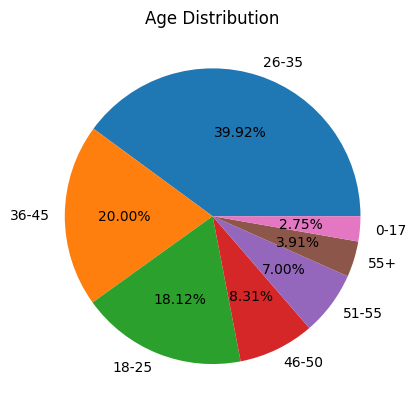

In [ ]:
col = 'Age'
df_uni= df_raw[col].value_counts().to_frame()
print(f"{df_uni.columns[0]} Statistics distribution")
print(df_uni)
print('\n\n---------')
print(f"{df_uni.columns[0]} Percentage Distribution")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
plt.title(f"{df_uni.columns[1]} Distribution")
plt.pie(x = df_uni[df_uni.columns[1]], labels = df_uni[df_uni.columns[0]], autopct = '%.2f%%')
plt.show()

**Key Observation**
* Most Users belongs to ages 26–35 age ~40%
* users ages 36–45 are 20%, users ages 18–25 are 18%,
* very low users ages from age group 0–17, 55+ are below 5%

------
**2. Gender wise Distribution**

Gender Statistics distribution
   Gender
M  414259
F  135809


---------
Gender Percentage Distribution
   Gender
M   75.31
F   24.69


---------


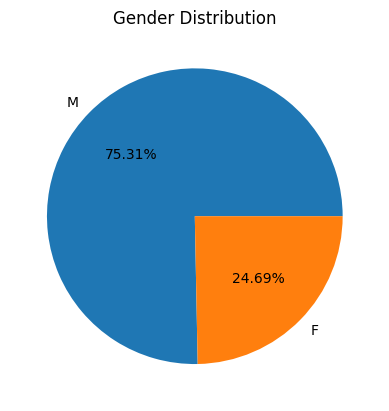

In [ ]:
col = 'Gender'
df_uni= df_raw[col].value_counts().to_frame()
print(f"{df_uni.columns[0]} Statistics distribution")
print(df_uni)
print('\n\n---------')
print(f"{df_uni.columns[0]} Percentage Distribution")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
plt.title(f"{df_uni.columns[1]} Distribution")
plt.pie(x = df_uni[df_uni.columns[1]], labels = df_uni[df_uni.columns[0]], autopct = '%.2f%%')
plt.show()


**Key Observation:**
Data indicates a significant disparity in purchase behavior between males and females during the Black Friday event.


-------------
c. Marital Status wise Distribution

Marital_Status Statistics distribution
           Marital_Status
Unmarried          324731
Married            225337


---------
Marital_Status Percentage Distribution
           Marital_Status
Unmarried           59.03
Married             40.97


---------


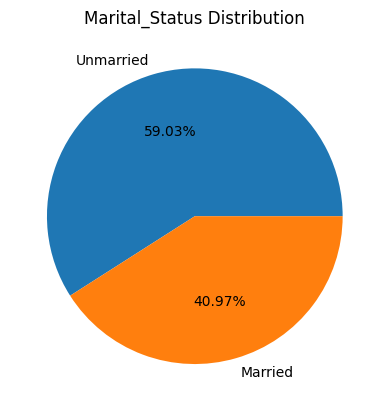

In [ ]:
col = 'Marital_Status'
df_uni= df_raw[col].value_counts().to_frame()
print(f"{df_uni.columns[0]} Statistics distribution")
print(df_uni)
print('\n\n---------')
print(f"{df_uni.columns[0]} Percentage Distribution")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
plt.title(f"{df_uni.columns[1]} Distribution")
plt.pie(x = df_uni[df_uni.columns[1]], labels = df_uni[df_uni.columns[0]], autopct = '%.2f%%')
plt.show()


**Key Observation**
* 60% of users are single, and 40% are married.
* specific marketing campaigns or promotions that may be done for unmarried group.

---------
d. City wise Distribution

City_Category Statistics distribution
   City_Category
B         231173
C         171175
A         147720


---------
City_Category Percentage Distribution
   City_Category
B          42.03
C          31.12
A          26.85


---------


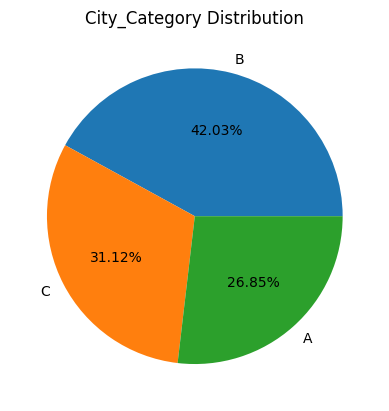

In [ ]:
col = 'City_Category'
df_uni= df_raw[col].value_counts().to_frame()
print(f"{df_uni.columns[0]} Statistics distribution")
print(df_uni)
print('\n\n---------')
print(f"{df_uni.columns[0]} Percentage Distribution")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
plt.title(f"{df_uni.columns[1]} Distribution")
plt.pie(x = df_uni[df_uni.columns[1]], labels = df_uni[df_uni.columns[0]], autopct = '%.2f%%')
plt.show()


**Key Observations:**
* City B saw the most number of transactions followed by City C and City A respectively.

-----
e. Distribution by Stay_In_Current_City_Years

Stay_In_Current_City_Years Statistics distribution
    Stay_In_Current_City_Years
1                       193821
2                       101838
3                        95285
4+                       84726
0                        74398


---------
Stay_In_Current_City_Years Percentage Distribution
    Stay_In_Current_City_Years
1                        35.24
2                        18.51
3                        17.32
4+                       15.40
0                        13.53


---------


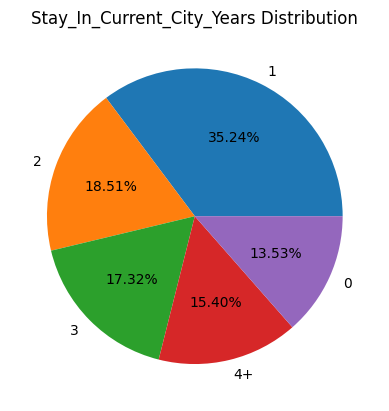

In [ ]:
col = 'Stay_In_Current_City_Years'
df_uni= df_raw[col].value_counts().to_frame()
print(f"{df_uni.columns[0]} Statistics distribution")
print(df_uni)
print('\n\n---------')
print(f"{df_uni.columns[0]} Percentage Distribution")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
plt.title(f"{df_uni.columns[1]} Distribution")
plt.pie(x = df_uni[df_uni.columns[1]], labels = df_uni[df_uni.columns[0]], autopct = '%.2f%%')
plt.show()

**Key Obaervation**

Most customer purchasing are new  in city about 50% are staying from 0-1 years in the city. Product relared to those may be promoted or advertised.

-------

f. Occupation wise Distribution



Occupation Statistics distribution
    Occupation
4        72308
0        69638
7        59133
1        47426
17       40043
20       33562
12       31179
14       27309
2        26588
16       25371
6        20355
3        17650
10       12930
5        12177
15       12165
11       11586
19        8461
13        7728
18        6622
9         6291
8         1546


---------
Occupation Percentage Distribution
    Occupation
4        13.15
0        12.66
7        10.75
1         8.62
17        7.28
20        6.10
12        5.67
14        4.96
2         4.83
16        4.61
6         3.70
3         3.21
10        2.35
5         2.21
15        2.21
11        2.11
19        1.54
13        1.40
18        1.20
9         1.14
8         0.28


---------


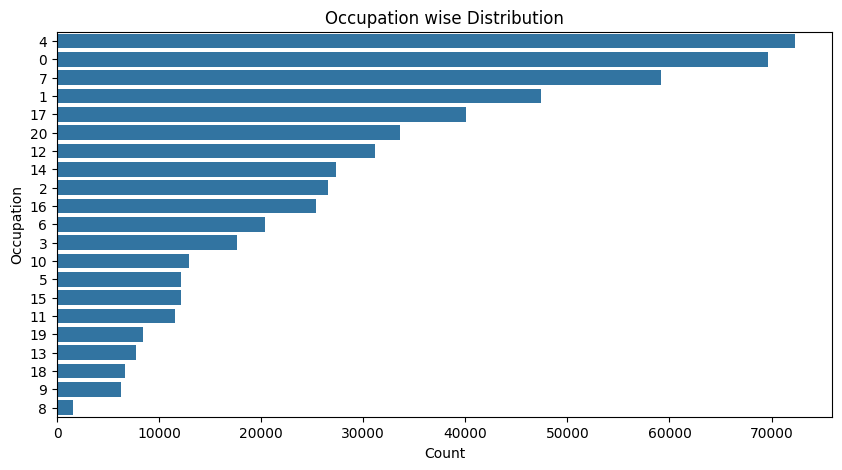

In [ ]:
col = 'Occupation'
df_uni= df_raw[col].value_counts().to_frame()
print(f"{df_uni.columns[0]} Statistics distribution")
print(df_uni)
print('\n\n---------')
print(f"{df_uni.columns[0]} Percentage Distribution")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
df_uni = df_uni.sort_values(by=df_uni.columns[1], ascending =False)
df_uni.rename(columns = {df_uni.columns[1]:'Count','index':df_uni.columns[1]}, inplace=True)

plt.figure(figsize=(10,5))
plt.title(f"{df_uni.columns[0]} wise Distribution")
sns.barplot(data= df_uni, y= df_uni[df_uni.columns[0]], x= df_uni[df_uni.columns[1]], order = df_uni[df_uni.columns[0]])
plt.show()

***Note: To see all results kindly scroll the result window***

** Key Observations:**
* 50% of Purchase is done from the  people having occupation as Categorised as 4,0,7,1,17 by walmart.
* higest conribution from 4(approx. 13%), 0(13%) and 7(11%).

-------------
g. Product_Category wise Distribution

Product_Category Statistics distribution
    Product_Category
5             150933
1             140378
8             113925
11             24287
2              23864
6              20466
3              20213
4              11753
16              9828
15              6290
13              5549
10              5125
12              3947
7               3721
18              3125
20              2550
19              1603
14              1523
17               578
9                410


---------
Product_Category Percentage Distribution
    Product_Category
5              27.44
1              25.52
8              20.71
11              4.42
2               4.34
6               3.72
3               3.67
4               2.14
16              1.79
15              1.14
13              1.01
10              0.93
12              0.72
7               0.68
18              0.57
20              0.46
19              0.29
14              0.28
17              0.11
9               0.07


---------


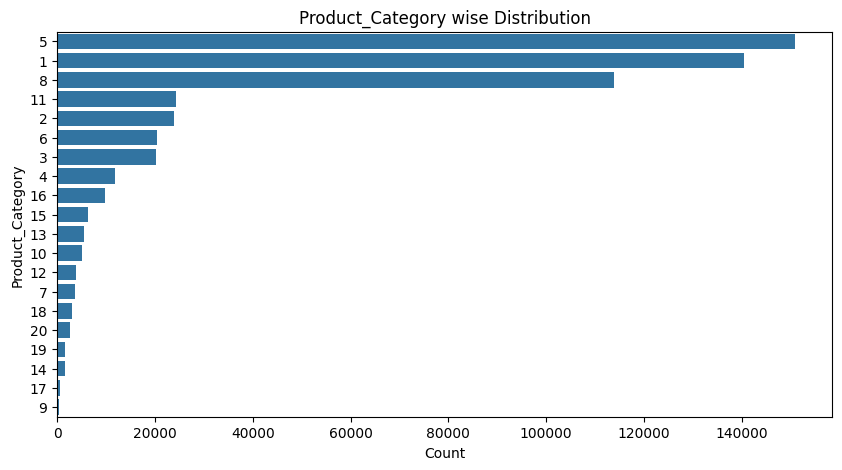

In [ ]:
col = 'Product_Category'
df_uni= df_raw[col].value_counts().to_frame()
print(f"{df_uni.columns[0]} Statistics distribution")
print(df_uni)
print('\n\n---------')
print(f"{df_uni.columns[0]} Percentage Distribution")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
df_uni = df_uni.sort_values(by=df_uni.columns[1], ascending =False)
df_uni.rename(columns = {df_uni.columns[1]:'Count','index':df_uni.columns[1]}, inplace=True)


plt.figure(figsize=(10,5))
plt.title(f"{df_uni.columns[0]} wise Distribution")
sns.barplot(data= df_uni, y= df_uni[df_uni.columns[0]], x= df_uni[df_uni.columns[1]], order = df_uni[df_uni.columns[0]])
plt.show()


***Note: To see all results kindly scroll the result window***

**Key Observations:**
* prodcuts category 5,1 and 8 contributes to 74% of sales. Prodct catgory 5 (27.44 %),1(25.52 %) and (20.71 %)

------
h. User Wise Distribution

Top 10  User_ID Statistics distribution of Purchase
         User_ID
1001680     1026
1004277      979
1001941      898
1001181      862
1000889      823
1003618      767
1001150      752
1001015      740
1005795      729
1005831      727


---------
Top 10  User_ID Percentage Distribution of Purchase
         User_ID
1001680     0.19
1004277     0.18
1001941     0.16
1001181     0.16
1000889     0.15
1003618     0.14
1001150     0.14
1001015     0.13
1005795     0.13
1005831     0.13


---------


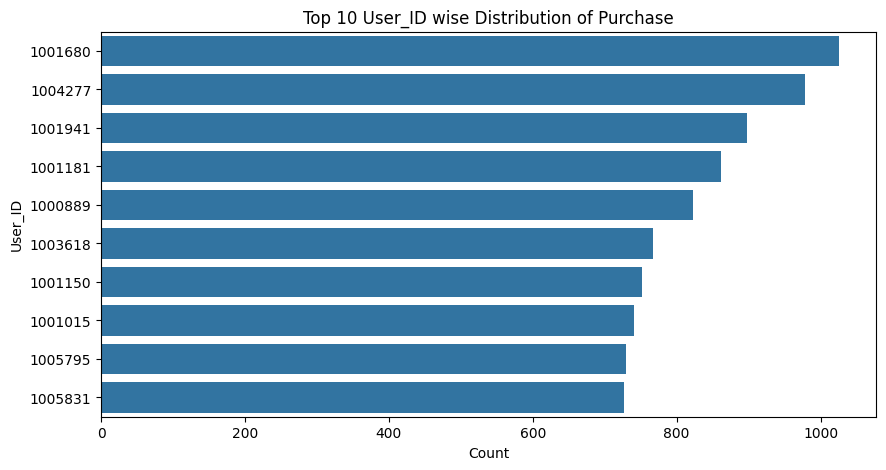

In [ ]:
col = 'User_ID'
top = 10
df_uni= df_raw[col].value_counts().to_frame().head(top)
print(f"Top {top}  {df_uni.columns[0]} Statistics distribution of Purchase")
print(df_uni)
print('\n\n---------')
print(f"Top {top}  {df_uni.columns[0]} Percentage Distribution of Purchase")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
df_uni = df_uni.sort_values(by=df_uni.columns[1], ascending =False)
df_uni.rename(columns = {df_uni.columns[1]:'Count','index':df_uni.columns[1]}, inplace=True)


plt.figure(figsize=(10,5))
plt.title(f"Top {top} {df_uni.columns[0]} wise Distribution of Purchase")
sns.barplot(data= df_uni, y= df_uni[df_uni.columns[0]], x= df_uni[df_uni.columns[1]], order = df_uni[df_uni.columns[0]])
plt.show()


**Key Observation:**
* Most of the top user 700 to 1000 trascations   
* percentage contribution is 0.13% to 0.19%

-----
i. Prodcut wise


Top 10  Product_ID Statistics distribution of Purchase
           Product_ID
P00265242        1880
P00025442        1615
P00110742        1612
P00112142        1562
P00057642        1470
P00184942        1440
P00046742        1438
P00058042        1422
P00145042        1406
P00059442        1406


---------
Top 10  Product_ID Percentage Distribution of Purchase
           Product_ID
P00265242        0.34
P00025442        0.29
P00110742        0.29
P00112142        0.28
P00057642        0.27
P00184942        0.26
P00046742        0.26
P00058042        0.26
P00145042        0.26
P00059442        0.26


---------


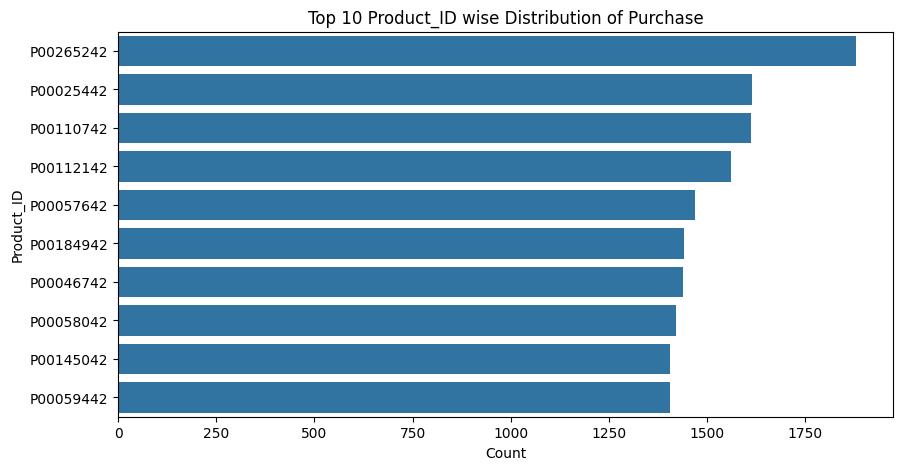

In [ ]:
col = 'Product_ID'
top = 10
df_uni= df_raw[col].value_counts().to_frame().head(top)
print(f"Top {top}  {df_uni.columns[0]} Statistics distribution of Purchase")
print(df_uni)
print('\n\n---------')
print(f"Top {top}  {df_uni.columns[0]} Percentage Distribution of Purchase")
print(round(df_uni/len(df_raw)*100,2))

print('\n\n---------')
df_uni = df_uni.reset_index()
df_uni = df_uni.sort_values(by=df_uni.columns[1], ascending =False)
df_uni.rename(columns = {df_uni.columns[1]:'Count','index':df_uni.columns[1]}, inplace=True)


plt.figure(figsize=(10,5))
plt.title(f"Top {top} {df_uni.columns[0]} wise Distribution of Purchase")
sns.barplot(data= df_uni, y= df_uni[df_uni.columns[0]], x= df_uni[df_uni.columns[1]], order = df_uni[df_uni.columns[0]])
plt.show()


**Key Observation:**
* Most of the top product sold are 1400 to 1900    
* percentage contribution is 0.26% to 0.34% of total sold product

-------
j. Purchase Amount wise Distribution

In [ ]:
col = 'Purchase'
top = 10
df_pad= df_raw[col].to_frame()
df_padvc = df_pad.value_counts().reset_index()
df_padvc.rename(columns = {df_padvc.columns[1]:'Count'}, inplace=True)

print(f"Top {top}  {df_padvc.columns[0]} Statistics distribution of Purchase")
print(df_padvc.head(top))



Top 10  Purchase Statistics distribution of Purchase
   Purchase  Count
0      7011    191
1      7193    188
2      6855    187
3      6891    184
4      7012    183
5      6960    183
6      7027    182
7      7166    182
8      6879    182
9      7165    180


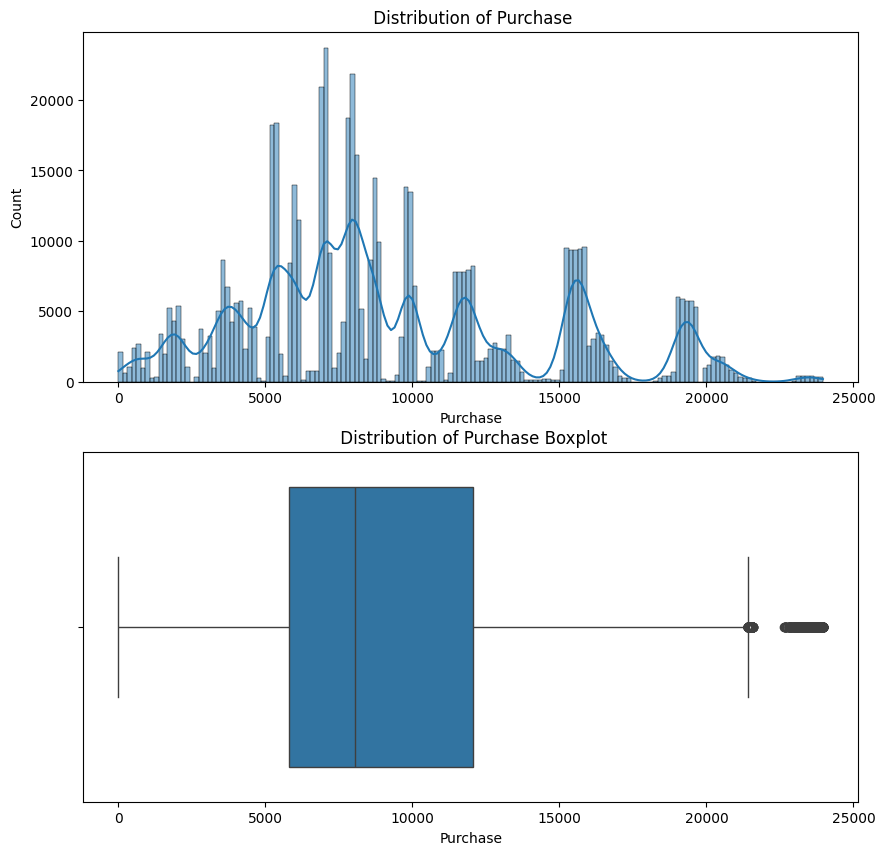

In [ ]:

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
sns.histplot(data=df_pad, x='Purchase', kde=True)
plt.title(f" Distribution of Purchase")

plt.subplot(2,1,2)
sns.boxplot(data=df_pad, x='Purchase')
plt.title(f" Distribution of Purchase Boxplot")
plt.show()

***Note: To see all results kindly scroll the result window***

In [ ]:
print(f'{col}  Distribution & Outliers')
df_para = df_raw[col].astype(float)
print(f"{col} Mean:", df_para.mean().round(2))
print(f"{col} Median:",df_para.median())
para_q1 = np.percentile(df_para,25)
para_q3 = np.percentile(df_para,75)
print(f"{col} Q1:", para_q1)
print(f"{col} Q3:", para_q3)
para_IQR = para_q3 - para_q1
print('Interquartile range (IQR):', para_IQR)
paraMin = para_q1 - 1.5*para_IQR
paraMax = para_q3 + 1.5*para_IQR
print(f'Min {col}:', paraMin)
print(f'Max {col}:', paraMax)
print(f'{col} Range:',paraMax-paraMin)
paraOut = df_para[(df_para < paraMin)|(df_para > paraMax)]
print('Outliers:',np.unique(paraOut.values))
print('Number of Outliers:',len(paraOut.values))
print('Percentage of Outliers:',round(len(paraOut.values)/len(df_para)*100,2),'%')

Purchase  Distribution & Outliers
Purchase Mean: 9263.97
Purchase Median: 8047.0
Purchase Q1: 5823.0
Purchase Q3: 12054.0
Interquartile range (IQR): 6231.0
Min Purchase: -3523.5
Max Purchase: 21400.5
Purchase Range: 24924.0
Outliers: [21401. 21402. 21404. ... 23959. 23960. 23961.]
Number of Outliers: 2677
Percentage of Outliers: 0.49 %


**Key Observation:**

Distribution
* Data suggests that the majority of customers spent between 5,823  and 12,054  , with the median purchase amount being 8,047.

* The lower limit of 12, (as the actual lower purchase i.e. 12 is higher than the Min Purchase range i.e. - 3523.5), while the upper limit of 21,400 reveal significant variability in customer spending

Outliers
* There are total of 2677 outliers which is roughly 0.49% of the total data present in purchase amount.


------


#Correlation:

<ipython-input-113-524f1b5fc4f2>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(),annot=True,cmap='Blues')


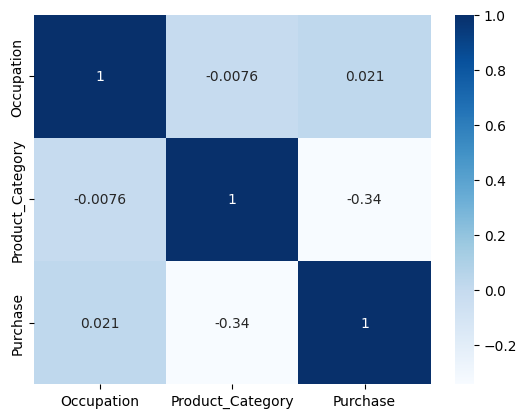

In [ ]:
df_corr = df_raw.copy()
for i in df_raw.columns:
  if i not in  ['Purchase','Occupation','Product_Category']:
    df_corr[i] = df_corr[i].astype(str)
  else:
    df_corr[i] = df_corr[i].astype(float)
sns.heatmap(df_corr.corr(),annot=True,cmap='Blues')
plt.show()

**Key Observation:**
* All feild contains categorical data except Purchase.These Categorical feilds very limited bins.
* bins having more size to draw correation compared.
* From the above correlation plot, we can see the correlation is not significant between any pair of variables.

#***Bivariate Analysis:***
Overall behaviour w.r.t Purchase

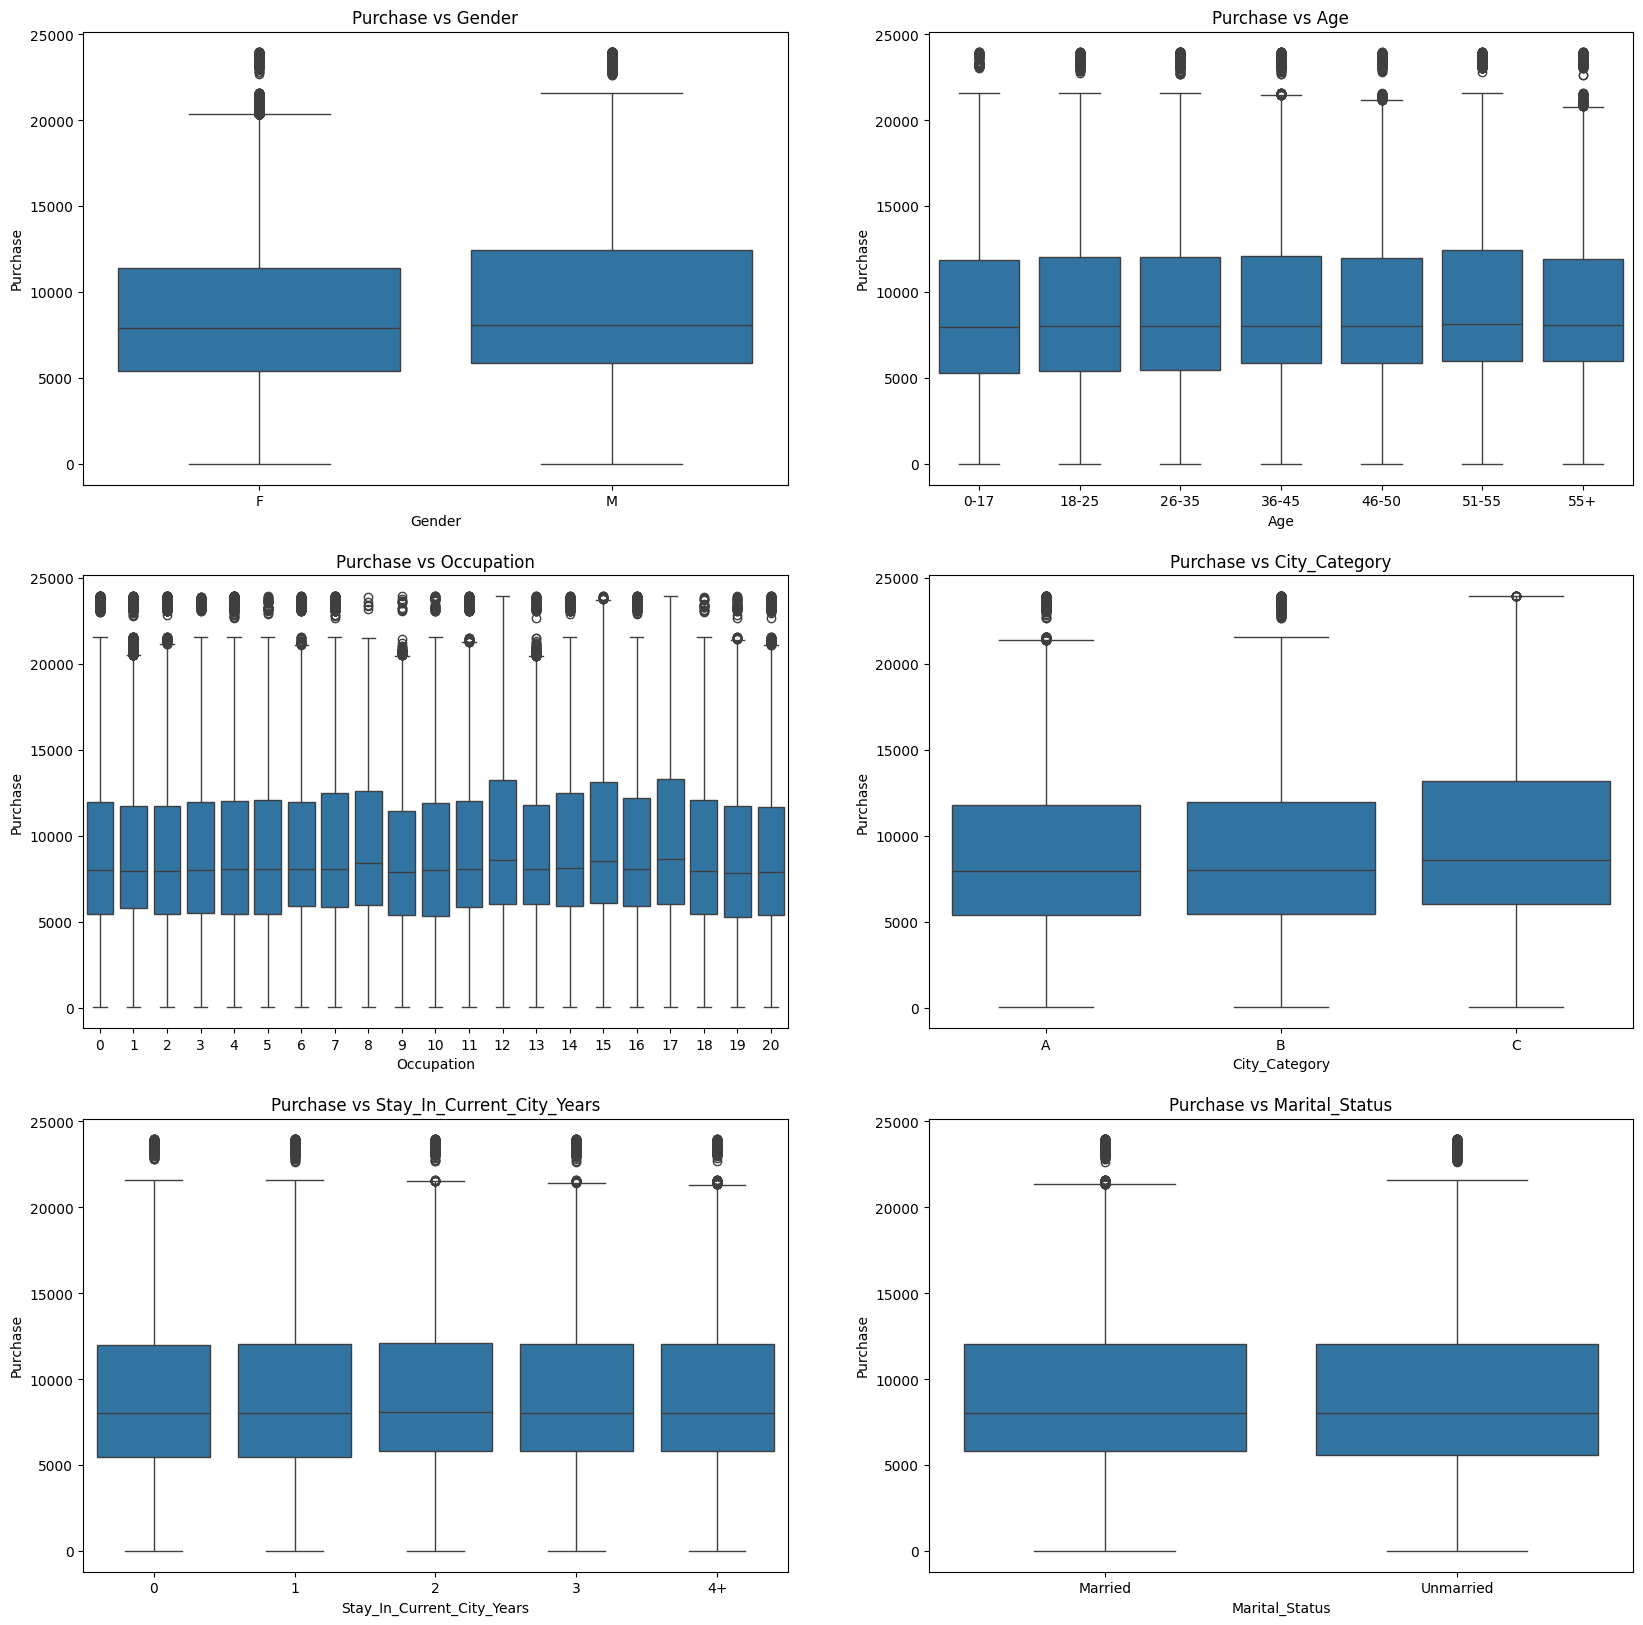

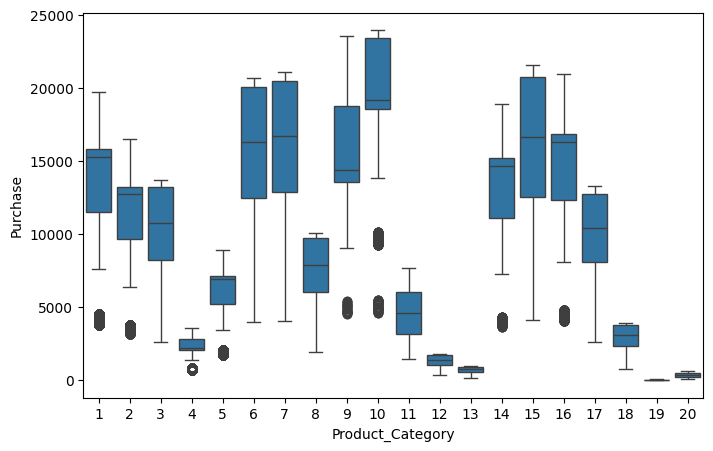

In [ ]:
para1 = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
count =1
plt.figure(figsize=(20, 20))
for i in para1:
  plt.subplot(3,2,count)
  sns.boxplot(data=df_raw, y='Purchase', x=i)
  plt.title(f"Purchase vs {i}")
  count += 1
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_raw, y='Purchase', x='Product_Category')
plt.show()

***Note: To see all results kindly scroll the result window***

**Key Observations**

Gender vs. Purchase
* The median for males and females is almost equal.
* Females have more outliers compared to males.
* Males purchased more compared to females.

Age vs. Purchase
* The median for all age groups is almost equal.
* Outliers are present in all age groups.

Occupation vs. Purchase
* The median for most occupation is same.
* Outliers are present in all occupation except 12 and 17 .

City Category vs. Purchase
* The C city region has very low outliers compared to other cities.
* A and B city region medians are almost the same.

Current City in Years vs. Purchase
* The median for all groups is almost equal.
* Outliers are present in all groups.

Martial Status vs. Purchase
* The median for married and single people is almost equal.
* Outliers are present in both records.


Product Categoty vs. Purchase
* comparision of one to another is difficult as madien and outlines variation are ver high.  






----------
#***Multivariate analysis:***


A. Relation between Procut and Age Gropus vs Purchase


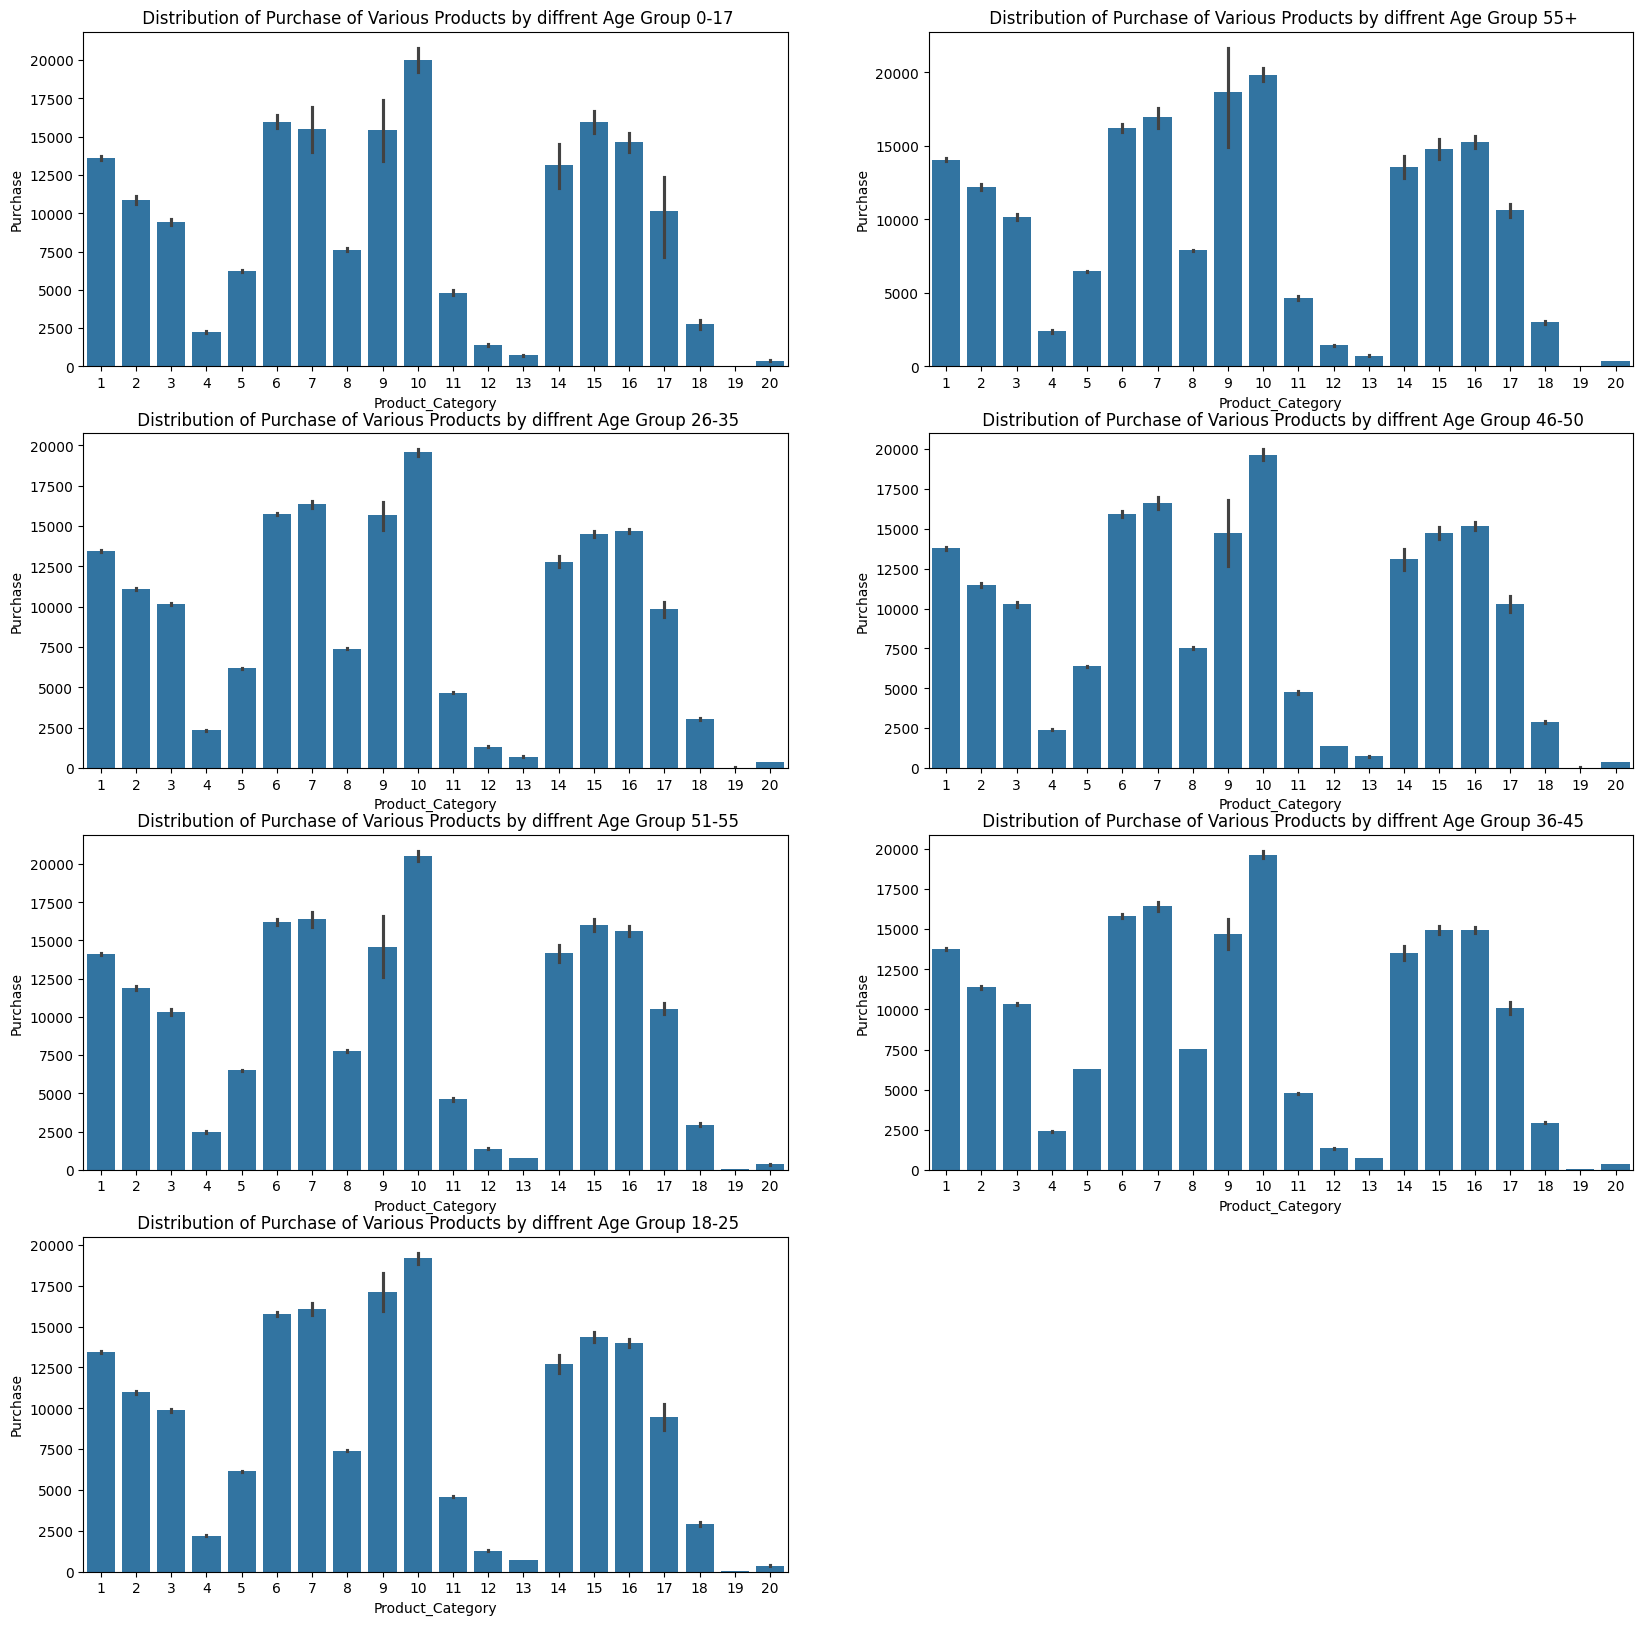

In [ ]:
para1 = df_raw['Age'].unique()
plt.figure(figsize=(20,20))
count =1
for i in para1:
  plt.subplot(4,2,count)
  df_local= df_raw[df_raw['Age']==i]
  sns.barplot(data=df_local, y='Purchase', x='Product_Category')
  plt.title(f" Distribution of Purchase of Various Products by diffrent Age Group {i}")
  count+=1

plt.show()


***Note: To see all results kindly scroll the result window***

-------
B. Gender vs Prodcut Category vs Puchase

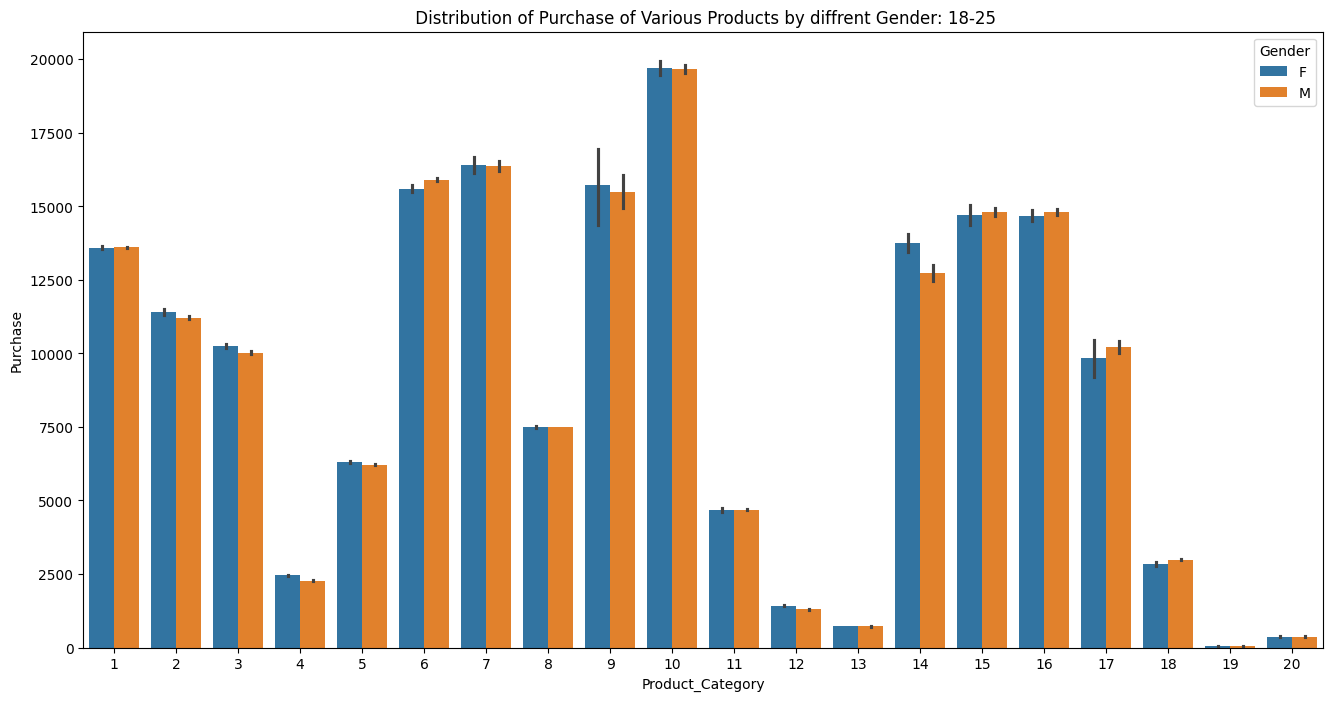

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(data=df_raw, y='Purchase', x='Product_Category', hue = 'Gender')
plt.title(f" Distribution of Purchase of Various Products by diffrent Gender: {i}")

plt.show()

***Note: To see all results kindly scroll the result window***

C. Above and Other Parameters using boxplot

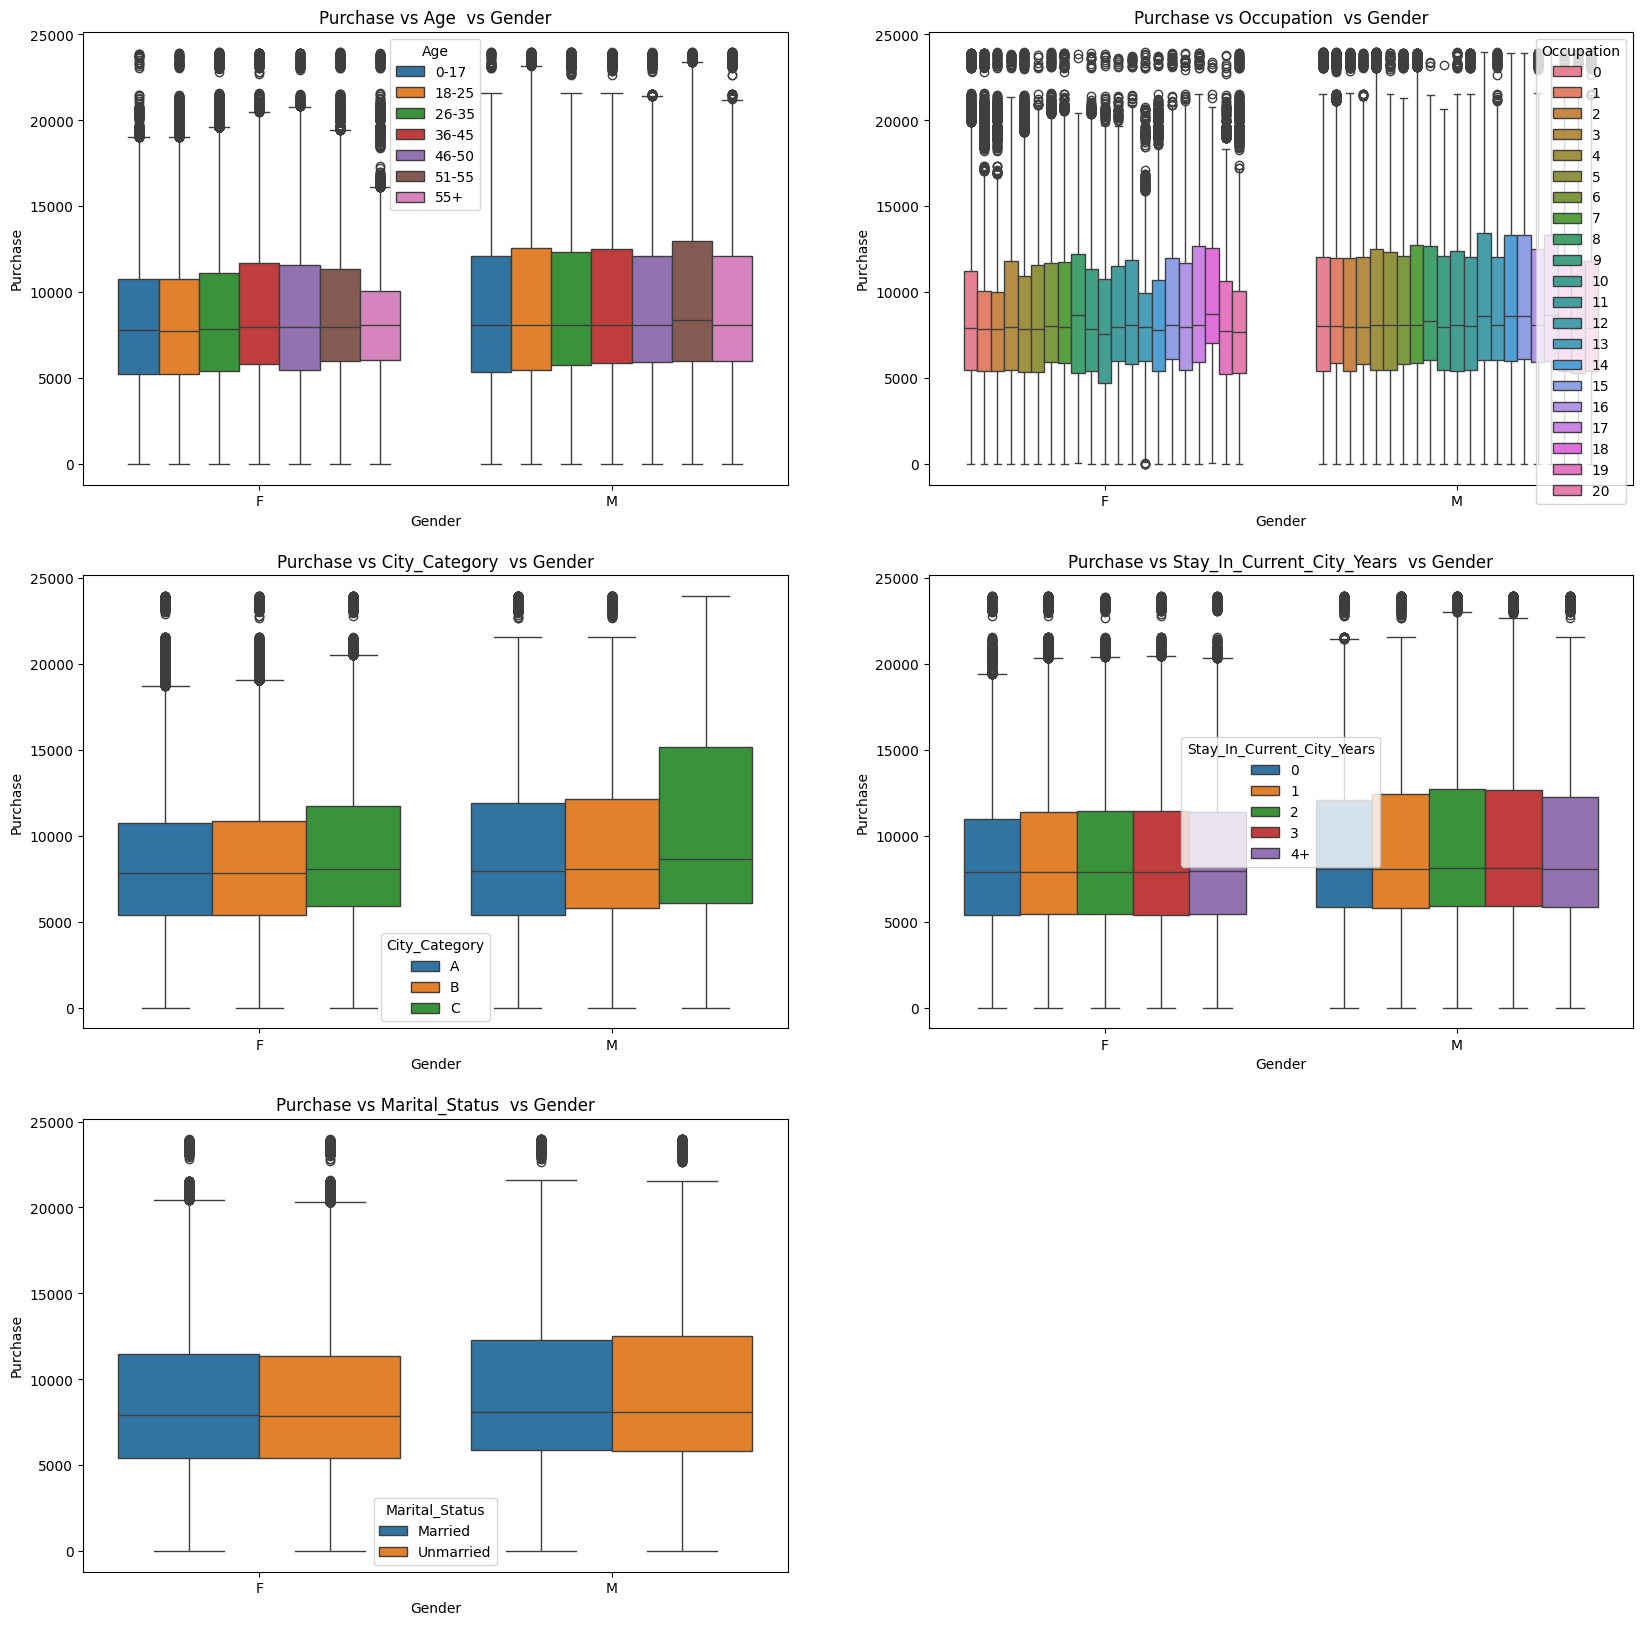

In [ ]:
para2 = ['Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
count =1
plt.figure(figsize=(20, 20))
for i in para2:
  plt.subplot(3,2,count)
  sns.boxplot(data=df_raw, y='Purchase', x='Gender', hue=i)
  plt.title(f"Purchase vs {i}  vs Gender")
  count += 1
plt.show()

***Note: To see all results kindly scroll the result window***

**Key Obserations**
* The purchasing pattern is very much similar for males and females even among differnt age groups.
* The purchasing behaviour of males and females basis different citi categories is also similar in nature. Males from city category C tends to purchase costlier products in comparison to females.
* Males and females spending behaviour remains similar even when take into account their marital status.
* Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.

-------
# Data Exploration, CLT and Confidance Interval

-----------
#A. Gender vs Purchase

**Exploring Data Distributuion, mean, median and Outliners**

In [ ]:
df_raw.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
# Analysing Purachse with Gender
col = 'Gender'
df_two = df_raw.groupby(col)['Purchase'].agg(['sum','count']).reset_index()
df_two['sum(mil)'] = round(df_two['sum'] / 10**6,2)
df_two['%_sum'] = round(df_two['sum']/df_two['sum'].sum(),3)
df_two['per_purchase'] = round(df_two['sum']/df_two['count'])
df_two

,Gender,sum,count,sum(mil),%_sum,per_purchase
0,F,1186232642,135809,1186.23,0.233,8735.0
1,M,3909580100,414259,3909.58,0.767,9438.0


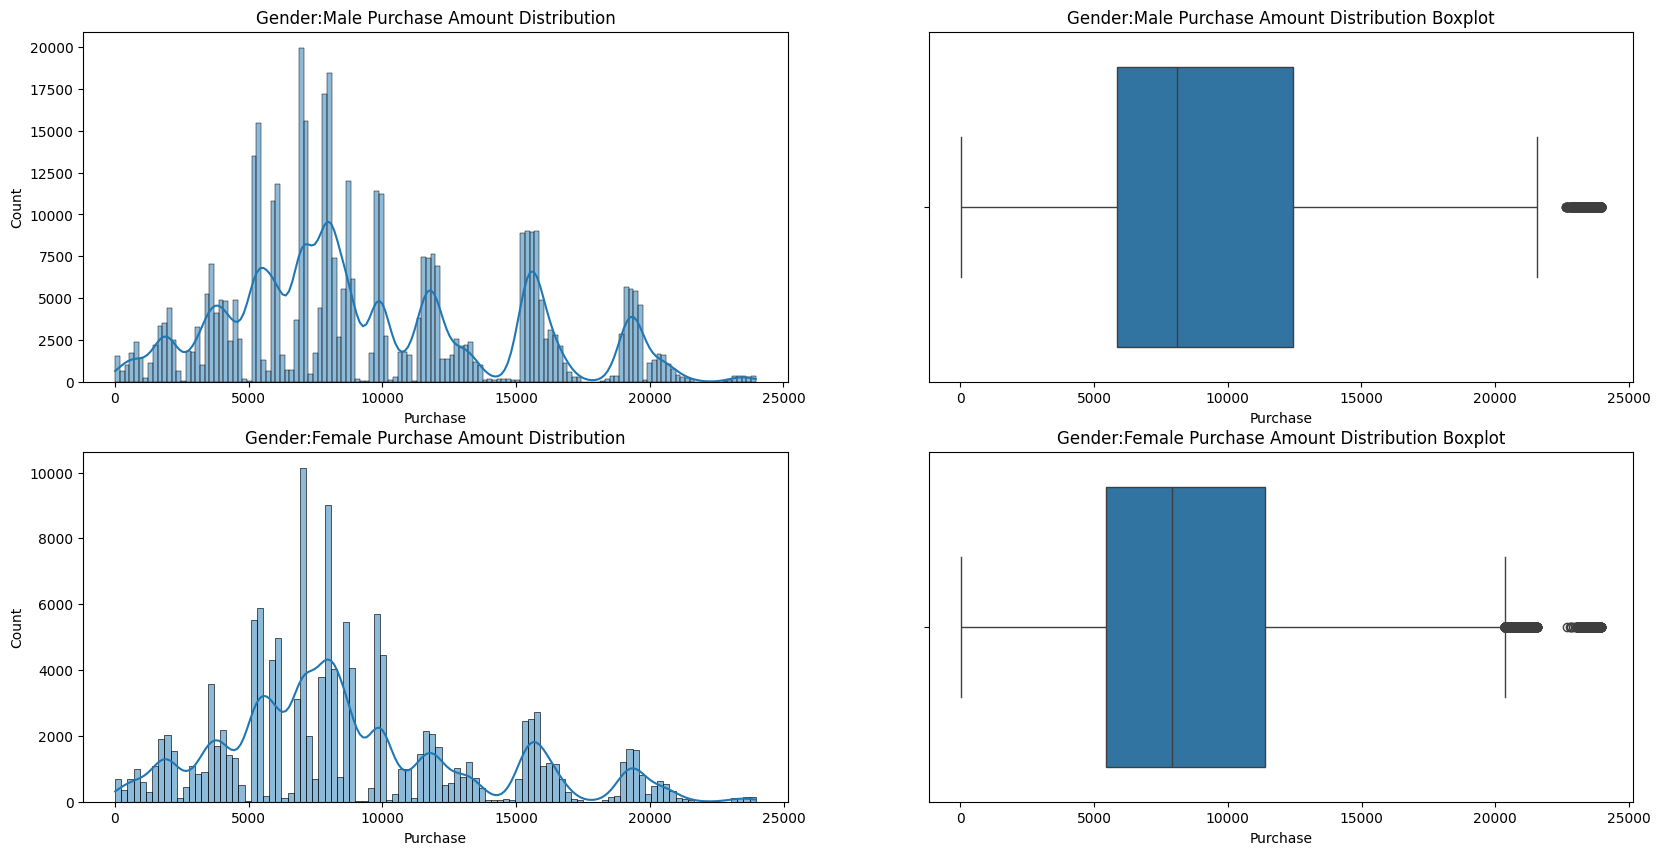

In [ ]:
# Gender Vs Purchase
col = 'Gender'
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title(f"{col}:Male Purchase Amount Distribution")
sns.histplot(data=df_raw[df_raw[col]=='M'], x='Purchase', kde=True)
plt.subplot(2,2,2)
plt.title(f"{col}:Male Purchase Amount Distribution Boxplot")
sns.boxplot(data=df_raw[df_raw[col]=='M'], x='Purchase')
plt.subplot(2,2,3)
plt.title(f"{col}:Female Purchase Amount Distribution")
sns.histplot(data=df_raw[df_raw[col]=='F'], x='Purchase', kde=True)
plt.subplot(2,2,4)
plt.title(f"{col}:Female Purchase Amount Distribution Boxplot")
sns.boxplot(data=df_raw[df_raw[col]=='F'], x='Purchase')
plt.show()

***Note: To see all results kindly scroll the result window***

**Key Observation:**

* The total purchase amount and number of transactions by male customers was more than three times the amount and transactions by female customers indicating
that they had a more significant impact on the Black Friday sales.
* The average purchase amount per transaction was slightly higher for male customers than female customers (9438 vs 8735) .
* As seen above, the purchase amount for both the genders is not normally distributed .

In [ ]:
# Outliers in Gender: Male Distribution
del col
col = 'Gender'
gens = 'M'
gen = 'Male'
print(f'{col}:{gen} Purchase Amount Distribution & Outliers')
df_para = df_raw[df_raw[col]==gens]['Purchase'].astype(float)
print(f"{col}:{gen} Purchase Amount Mean:", df_para.mean().round(2))
print(f"{col}:{gen} Purchase Amount Median:",df_para.median())
para_q1 = np.percentile(df_para,25)
para_q3 = np.percentile(df_para,75)
print(f"{col}:{gen} Purchase Amount Q1:", para_q1)
print(f"{col}:{gen} Purchase Amount Q3:", para_q3)
para_IQR = para_q3 - para_q1
print('Interquartile range (IQR):', para_IQR)
paraMin = para_q1 - 1.5*para_IQR
paraMax = para_q3 + 1.5*para_IQR
print(f'Min {col}:{gen}:', paraMin)
print(f'Max {col}:{gen}:', paraMax)
print(f'{col}:{gen} Purchase Amount Range:',paraMax-paraMin)
paraOut = df_para[(df_para < paraMin)|(df_para > paraMax)]
print('Number of Purchase Amount Outliers:',len(paraOut.values))
print('Percentage of Purchase Amount Outliers:',round(len(paraOut.values)/len(df_para)*100,2),'%')

Gender:Male Purchase Amount Distribution & Outliers
Gender:Male Purchase Amount Mean: 9437.53
Gender:Male Purchase Amount Median: 8098.0
Gender:Male Purchase Amount Q1: 5863.0
Gender:Male Purchase Amount Q3: 12454.0
Interquartile range (IQR): 6591.0
Min Gender:Male: -4023.5
Max Gender:Male: 22340.5
Gender:Male Purchase Amount Range: 26364.0
Number of Purchase Amount Outliers: 1812
Percentage of Purchase Amount Outliers: 0.44 %


In [ ]:
# Outliers in Gender Female Distribution
del col
col = 'Gender'
gens = 'F'
gen = 'Female'
print(f'{col}:{gen} Purchase Amount Distribution & Outliers')
df_para = df_raw[df_raw[col]==gens]['Purchase'].astype(float)
print(f"{col}:{gen} Purchase Amount Mean:", df_para.mean().round(2))
print(f"{col}:{gen} Purchase Amount Median:",df_para.median())
para_q1 = np.percentile(df_para,25)
para_q3 = np.percentile(df_para,75)
print(f"{col}:{gen} Purchase Amount Q1:", para_q1)
print(f"{col}:{gen} Purchase Amount Q3:", para_q3)
para_IQR = para_q3 - para_q1
print('Interquartile range (IQR):', para_IQR)
paraMin = para_q1 - 1.5*para_IQR
paraMax = para_q3 + 1.5*para_IQR
print(f'Min {col}:{gen}:', paraMin)
print(f'Max {col}:{gen}:', paraMax)
print(f'{col}:{gen} Purchase Amount Range:',paraMax-paraMin)
paraOut = df_para[(df_para < paraMin)|(df_para > paraMax)]
print('Number of Purchase Amount Outliers:',len(paraOut.values))
print('Percentage of Purchase Amount Outliers:',round(len(paraOut.values)/len(df_para)*100,2),'%')

Gender:Female Purchase Amount Distribution & Outliers
Gender:Female Purchase Amount Mean: 8734.57
Gender:Female Purchase Amount Median: 7914.0
Gender:Female Purchase Amount Q1: 5433.0
Gender:Female Purchase Amount Q3: 11400.0
Interquartile range (IQR): 5967.0
Min Gender:Female: -3517.5
Max Gender:Female: 20350.5
Gender:Female Purchase Amount Range: 23868.0
Number of Purchase Amount Outliers: 2065
Percentage of Purchase Amount Outliers: 1.52 %


--------
To look the unique Customer behaviour will go by the details of the User ID and Gender vs Purchase

In [ ]:
df_amt_gen = df_raw.groupby(['User_ID', 'Gender'])['Purchase'].agg(['sum','mean'])
df_amt_gen = df_amt_gen.dropna(axis=0,how='any').reset_index()
print(f"Top 10 purchase from male and female\n {df_amt_gen.sort_values(by='sum', ascending=False).head(10)}")
print('-'*60)
print(f"Top 10 Average purchase from male and female\n {df_amt_gen.sort_values(by='mean', ascending=False).head(10)}")

Top 10 purchase from male and female
       User_ID Gender       sum          mean
4166  1004277      M  10536909  10762.930541
1634  1001680      M   8699596   8479.138402
2831  1002909      M   7577756  10553.977716
1885  1001941      M   6817493   7591.863029
416   1000424      M   6573609   9472.059078
4335  1004448      M   6566245  11419.556522
5683  1005831      M   6512433   8957.954608
981   1001015      M   6511314   8799.072973
3297  1003391      M   6477160   9279.598854
1142  1001181      M   6387961   7410.627610
------------------------------------------------------------
Top 10 Average purchase from male and female
       User_ID Gender      sum          mean
3801  1003902      M  1746322  18577.893617
4943  1005069      F   332823  18490.166667
5849  1005999      F   330227  18345.944444
1307  1001349      M   417743  18162.739130
3367  1003461      M   350174  17508.700000
98    1000101      F  1138265  17246.439394
2902  1002983      M   520509  16790.612903
5844  10

In [ ]:
# Gender wise Count
Gender_wise_count=df_amt_gen['Gender'].value_counts()
print(f'Total count : {Gender_wise_count.sum()}')
print(f'Gender wise count : \n{Gender_wise_count}')

Total count : 5891
Gender wise count : 
M    4225
F    1666
Name: Gender, dtype: int64


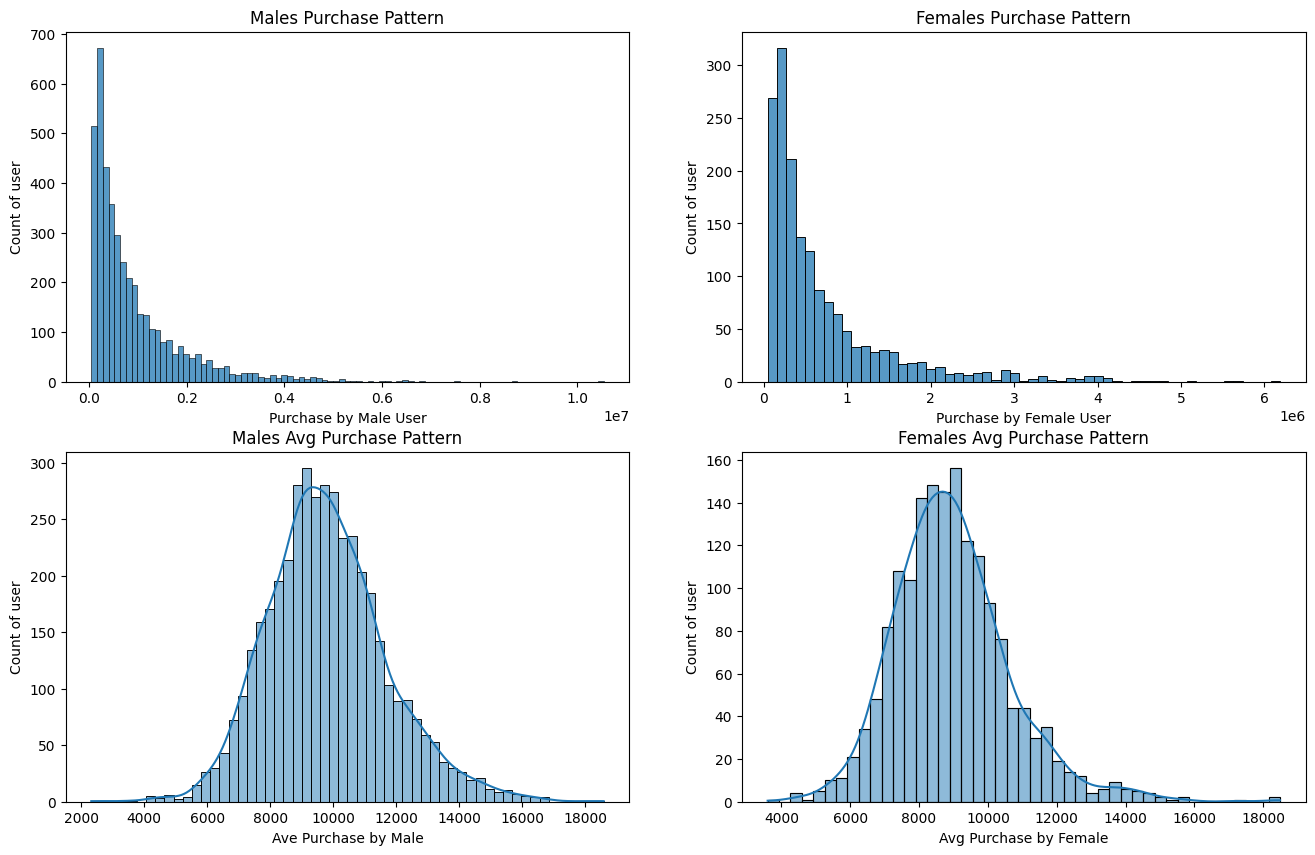

In [ ]:
plt.figure(figsize=(16,10))
male_data = df_amt_gen[df_amt_gen['Gender']=='M']['sum']
plt.subplot(2,2,1)
sns.histplot(data=male_data)
plt.xlabel('Purchase by Male User')
plt.ylabel('Count of user')
plt.title("Males Purchase Pattern")

female_data = df_amt_gen[df_amt_gen['Gender']=='F']['sum']
plt.subplot(2,2,2)
sns.histplot(data=female_data)
plt.xlabel('Purchase by Female User')
plt.ylabel('Count of user')
plt.title("Females Purchase Pattern")

male_data_avg = df_amt_gen[df_amt_gen['Gender']=='M']['mean']
plt.subplot(2,2,3)
sns.histplot(data=male_data_avg,kde=True)
plt.xlabel('Ave Purchase by Male')
plt.ylabel('Count of user')
plt.title("Males Avg Purchase Pattern")

female_data_avg = df_amt_gen[df_amt_gen['Gender']=='F']['mean']
plt.subplot(2,2,4)
sns.histplot(data=female_data_avg, kde=True)
plt.xlabel('Avg Purchase by Female')
plt.ylabel('Count of user')
plt.title("Females Avg Purchase Pattern")
plt.show()

***Note: To see all results kindly scroll the result window***

**Key Observation:**

* Male customers spend more money than female customers.
* The highest purchase has been made from male user the User_id: '1004277', . And avg spent is also from a male having User Id '1005069'.
* in Average spent there amix of male and female customers.
* Average purchase follwos normal distribution pattern.

**Exploring Probaility Distribution using Control Limit Theorm and Confidance Interval**

Here we have taken the condition of the estimating Average Purchase Amount per Transaction

In [ ]:
#creating separate data frames for each gender
df_male = df_raw[df_raw['Gender'] == 'M']['Purchase']
df_female = df_raw[df_raw['Gender'] == 'F']['Purchase']

In [ ]:
#sample sizes and corresponding plot positions
sample_sizes = [100,300,3000,30000]
#number of samples to be taken from purchase amount
bs_sample_nos = 10000
male_samples = {}
female_samples = {}
for i in sample_sizes:
  male_means = [] #list for collecting the means of male sample
  female_means = [] #list for collecting the means of female sample
  for j in range(bs_sample_nos):
    m_bs_samples = np.random.choice(df_male,size = i)
    f_bs_samples = np.random.choice(df_female,size = i)
    m_sample_mean = np.mean(m_bs_samples)
    f_sample_mean = np.mean(f_bs_samples)
    male_means.append(m_sample_mean)
    female_means.append(f_sample_mean)
    male_samples[f'{i}'] = male_means
    female_samples[f'{i}'] = female_means

In [ ]:
#Creating Samples Data Frame
df_male_dat= pd.DataFrame(data = male_samples)
df_female_dat= pd.DataFrame(data = female_samples)

In [ ]:
df_male_dat

,100,300,3000,30000
0,8870.84,9163.826667,9522.951333,9442.083700
1,9706.89,9330.963333,9412.165000,9460.065767
2,9919.04,9471.333333,9304.869333,9406.747800
3,9355.35,9520.330000,9337.095000,9404.608533
4,10445.65,9554.640000,9391.530000,9453.233267
...,...,...,...,...
9995,9659.81,9359.940000,9485.090333,9457.996867
9996,8703.91,9441.460000,9425.018667,9408.221467
9997,8879.68,9102.700000,9413.653000,9369.306133
9998,10121.03,9458.080000,9564.085000,9468.926433


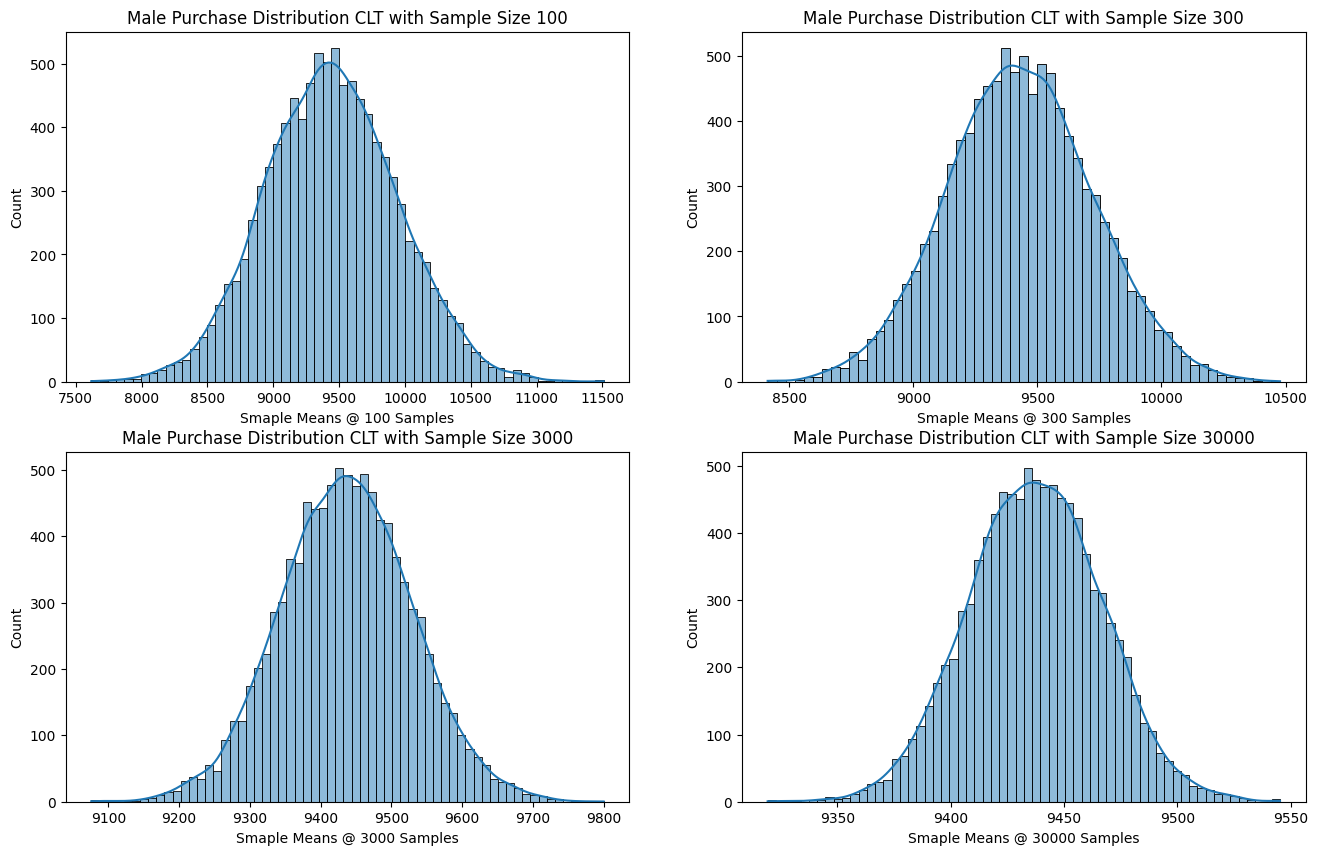

In [ ]:
#Normal Distribution from CLT
df_dat_plt = df_male_dat
plt_no=1
plt.figure(figsize= (16,10))
for i in df_dat_plt.columns:
  plt.subplot(2,2,plt_no)
  sns.histplot(data=df_dat_plt[i], kde=True)
  plt.title(f'Male Purchase Distribution CLT with Sample Size {i}')
  plt.xlabel(f'Smaple Means @ {i} Samples')
  plt_no+=1

plt.show()


***Note: To see all results kindly scroll the result window***

In [ ]:
#Finding the sample values
df_avd_spet_gen = df_raw.groupby(['Gender'])['Purchase'].mean()
df_avd_spet_gen= df_avd_spet_gen.reset_index()

Male_cust_avg = df_avd_spet_gen.loc[df_avd_spet_gen['Gender']=='M']['Purchase'].values[0]
Female_cust_avg = df_avd_spet_gen.loc[df_avd_spet_gen['Gender']=='F']['Purchase'].values[0]
print(f'Male customer average spent amount: {round(Male_cust_avg,2)}')
print(f'Female customer average spent amount: {round(Female_cust_avg,2)}')

Male customer average spent amount: 9437.53
Female customer average spent amount: 8734.57


In [ ]:
dat_tab = {'sample_size':[], 'confi_interval':[],'z_score':[],'pop_smaple':[],'sample_mean':[], 'sample_std':[], 'ci_lower_limt':[], 'ci_upper_limt':[], 'Range':[]}
male_ci_tables = pd.DataFrame(data=  dat_tab)
female_ci_tables = pd.DataFrame(data=  dat_tab)

Since using sample standard deviation , hence calculation of the Standard Error is not required.

In [ ]:
df_dat_ci = df_male_dat
pop_sam = Male_cust_avg
count=0
ci = [90,95,99]
for k in ci:
  for i in df_dat_ci.columns:
    a= int(i)
    z_scr = round(stats.norm.ppf(1-(1-int(k)/100)/2),3)
    s_mean_ci=round(np.mean(df_dat_ci[i]),2)
    s_std_ci=round(pd.Series(df_dat_ci[i]).std(),2)
    UL_ci= round((s_mean_ci + z_scr*s_std_ci),2)
    LL_ci= round((s_mean_ci - z_scr*s_std_ci),2)
    male_ci_tables.loc[count] = [a,k,('+/- '+str(z_scr)),round(pop_sam,2),s_mean_ci,s_std_ci,LL_ci,UL_ci, (UL_ci-LL_ci)]
    count+=1

print('Confidance Interval Limits and Table for Purchase by Male')
print('-'*50)
male_ci_tables.sort_values(by='sample_size')

Confidance Interval Limits and Table for Purchase by Male
--------------------------------------------------


,sample_size,confi_interval,z_score,pop_smaple,sample_mean,sample_std,ci_lower_limt,ci_upper_limt,Range
0,100,90,+/- 1.645,9437.53,9442.43,502.88,8615.19,10269.67,1654.48
4,100,95,+/- 1.96,9437.53,9442.43,502.88,8456.79,10428.07,1971.28
8,100,99,+/- 2.576,9437.53,9442.43,502.88,8147.01,10737.85,2590.84
1,300,90,+/- 1.645,9437.53,9431.11,293.81,8947.79,9914.43,966.64
5,300,95,+/- 1.96,9437.53,9431.11,293.81,8855.24,10006.98,1151.74
9,300,99,+/- 2.576,9437.53,9431.11,293.81,8674.26,10187.96,1513.70
2,3000,90,+/- 1.645,9437.53,9436.56,92.59,9284.25,9588.87,304.62
6,3000,95,+/- 1.96,9437.53,9436.56,92.59,9255.08,9618.04,362.96
10,3000,99,+/- 2.576,9437.53,9436.56,92.59,9198.05,9675.07,477.02
3,30000,90,+/- 1.645,9437.53,9437.20,29.36,9388.90,9485.50,96.60


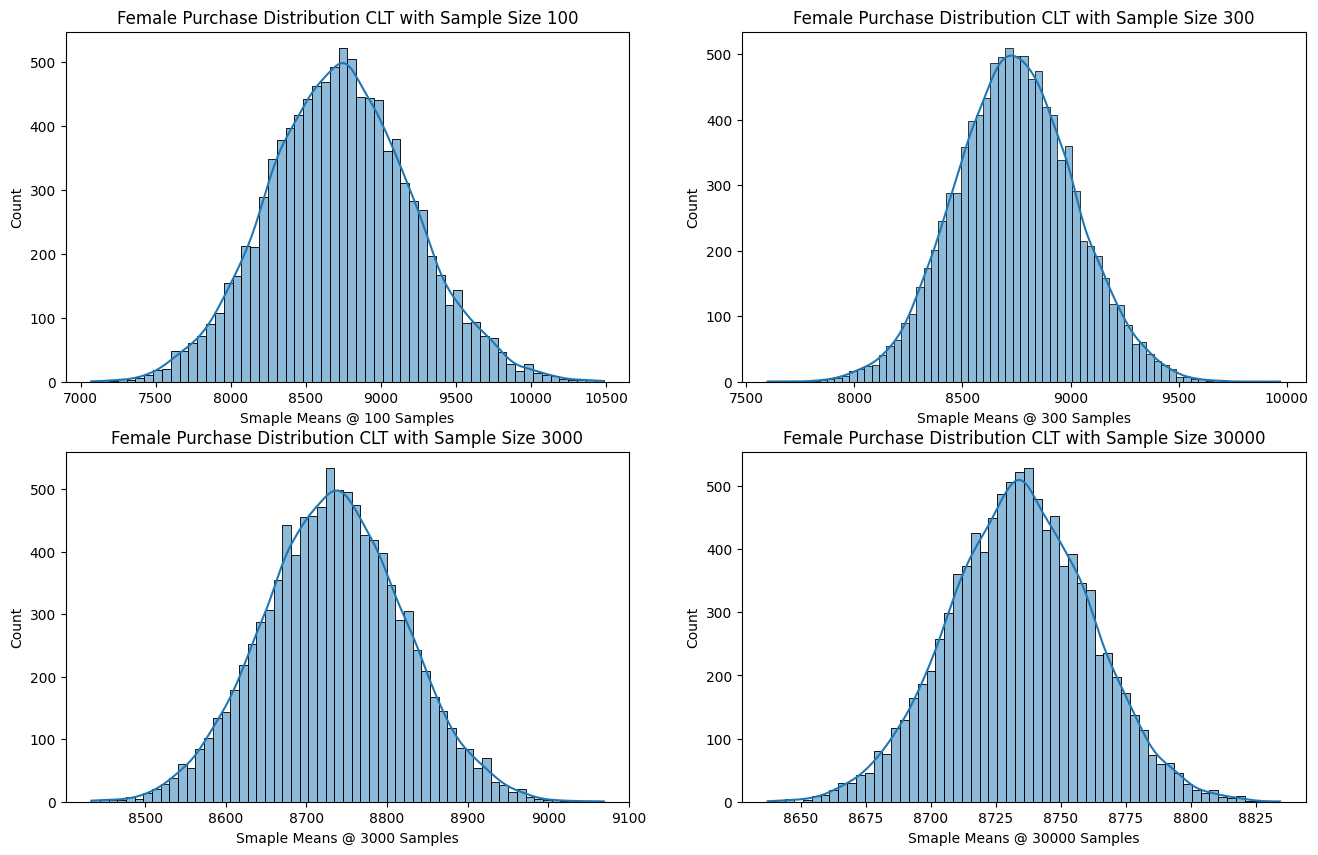

In [ ]:
#Normal Distribution from CLT
df_dat_plt = df_female_dat
plt_no=1
plt.figure(figsize= (16,10))
for i in df_dat_plt.columns:
  plt.subplot(2,2,plt_no)
  sns.histplot(data=df_dat_plt[i], kde=True)
  plt.title(f'Female Purchase Distribution CLT with Sample Size {i}')
  plt.xlabel(f'Smaple Means @ {i} Samples')
  plt_no+=1

plt.show()


***Note: To see all results kindly scroll the result window***

In [ ]:
df_dat_ci = df_female_dat
pop_sam = Female_cust_avg
count=0
ci = [90,95,99]
for k in ci:
  for i in df_dat_ci.columns:
    a= int(i)
    z_scr = round(stats.norm.ppf(1-(1-int(k)/100)/2),3)
    s_mean_ci=round(np.mean(df_dat_ci[i]),2)
    s_std_ci=round(pd.Series(df_dat_ci[i]).std(),2)
    UL_ci= round((s_mean_ci + z_scr*s_std_ci),2)
    LL_ci= round((s_mean_ci - z_scr*s_std_ci),2)
    female_ci_tables.loc[count] = [a,k,('+/- '+str(z_scr)),round(pop_sam,2),s_mean_ci,s_std_ci,LL_ci,UL_ci, (UL_ci-LL_ci)]
    count+=1

print('Confidance Interval Limits and Table for Purchase by Female')
print('-'*50)
female_ci_tables.sort_values(by='sample_size')

Confidance Interval Limits and Table for Purchase by Female
--------------------------------------------------


,sample_size,confi_interval,z_score,pop_smaple,sample_mean,sample_std,ci_lower_limt,ci_upper_limt,Range
0,100,90,+/- 1.645,8734.57,8731.85,478.01,7945.52,9518.18,1572.66
4,100,95,+/- 1.96,8734.57,8731.85,478.01,7794.95,9668.75,1873.80
8,100,99,+/- 2.576,8734.57,8731.85,478.01,7500.50,9963.20,2462.70
1,300,90,+/- 1.645,8734.57,8742.33,275.36,8289.36,9195.30,905.94
5,300,95,+/- 1.96,8734.57,8742.33,275.36,8202.62,9282.04,1079.42
9,300,99,+/- 2.576,8734.57,8742.33,275.36,8033.00,9451.66,1418.66
2,3000,90,+/- 1.645,8734.57,8733.75,86.70,8591.13,8876.37,285.24
6,3000,95,+/- 1.96,8734.57,8733.75,86.70,8563.82,8903.68,339.86
10,3000,99,+/- 2.576,8734.57,8733.75,86.70,8510.41,8957.09,446.68
3,30000,90,+/- 1.645,8734.57,8734.36,27.21,8689.60,8779.12,89.52


**Key Observations:**

Sample Size
* sample size has an effect in estimating population parameters.
* increase in the sample size, the confidence
intervals become narrower and more precise .
* The larger sample sizes can provide more reliable insights and estimates.

Confidence Intervals
* For sample size 100 and 300 the intervals overlaps
* The confidence interval do not overlap as the sample size increases.
* There is a statistically significant difference between the average spending per transaction for men and women within the given samples.

Population Average
*   We are confidentlt sugget the various levels at with intervals from above tables. like we are 95% confident that the true population average for males falls between 9,378 and 9,495, and for females , it falls between 8,681 and
8,789. For more details please refer to tables above.

Women spend less
* Men tend to spend more money per transaction on average than women , as the upper bounds of the confidence intervals for men are consistently
higher than those for women across different sample sizes.

-----------
#B. Age vs Purchase

**Exploring Data Distributuion, mean, median and Outliners**

In [ ]:
df_raw.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Married,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0
Unmarried,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0


In [ ]:
# Analysing Purachse with Marital_Status
col = 'Marital_Status'
df_two = df_raw.groupby(col)['Purchase'].agg(['sum','count']).reset_index()
df_two['sum(mil)'] = round(df_two['sum'] / 10**6,2)
df_two['%_sum'] = round(df_two['sum']/df_two['sum'].sum(),3)
df_two['per_purchase'] = round(df_two['sum']/df_two['count'])
df_two

,Marital_Status,sum,count,sum(mil),%_sum,per_purchase
0,Married,2086885295,225337,2086.89,0.41,9261.0
1,Unmarried,3008927447,324731,3008.93,0.59,9266.0


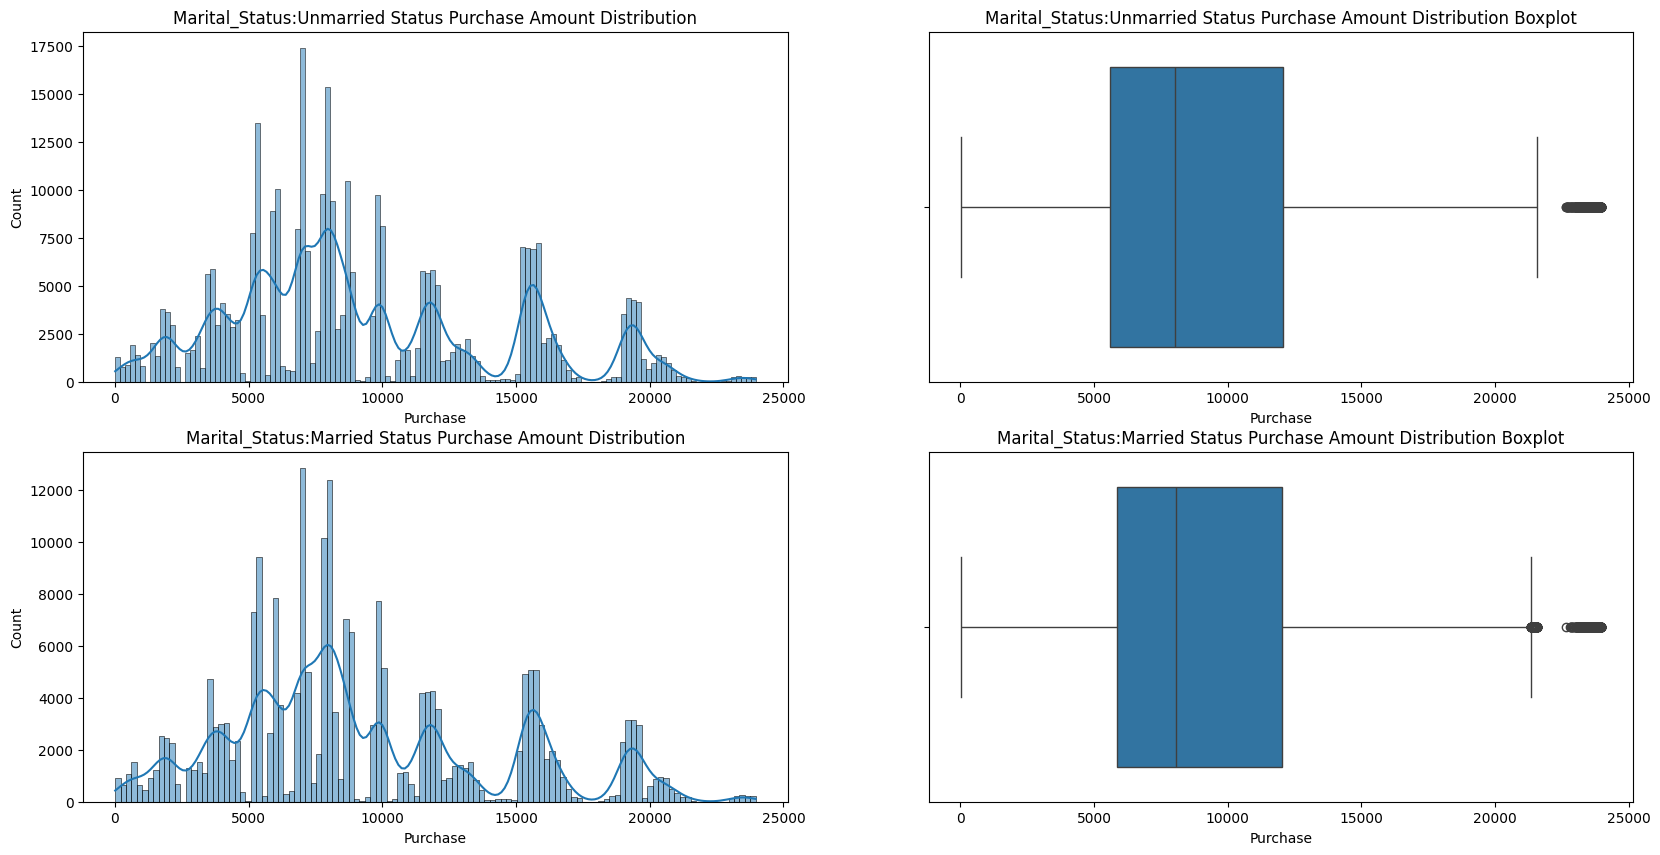

In [ ]:
# Marital_Status Vs Purchase
col = 'Marital_Status'
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title(f"{col}:Unmarried Status Purchase Amount Distribution")
sns.histplot(data=df_raw[df_raw[col]=='Unmarried'], x='Purchase', kde=True)
plt.subplot(2,2,2)
plt.title(f"{col}:Unmarried Status Purchase Amount Distribution Boxplot")
sns.boxplot(data=df_raw[df_raw[col]=='Unmarried'], x='Purchase')
plt.subplot(2,2,3)
plt.title(f"{col}:Married Status Purchase Amount Distribution")
sns.histplot(data=df_raw[df_raw[col]=='Married'], x='Purchase', kde=True)
plt.subplot(2,2,4)
plt.title(f"{col}:Married Status Purchase Amount Distribution Boxplot")
sns.boxplot(data=df_raw[df_raw[col]=='Married'], x='Purchase')
plt.show()

***Note: To see all results kindly scroll the result window***

**Key Observation:**

* The total purchase amount and number of transactions by Unmarried customers was more as compare to married customers indicating that they had a more significant impact on the Black Friday sales.
* The average purchase amount per transaction was almost similar for married and unmarried customers (9261 vs 9266) .
* the purchase amount for both married and unmarried customers is not normally distributed .

In [ ]:
# Outliers in Unmarried Distribution
del col
col = 'Marital_Status'
gens = 'Unmarried'
gen = 'Unmarried'
print(f'{col}:{gen} Purchase Amount Distribution & Outliers')
df_para = df_raw[df_raw[col]==gens]['Purchase'].astype(float)
print(f"{col}:{gen} Purchase Amount Mean:", df_para.mean().round(2))
print(f"{col}:{gen} Purchase Amount Median:",df_para.median())
para_q1 = np.percentile(df_para,25)
para_q3 = np.percentile(df_para,75)
print(f"{col}:{gen} Purchase Amount Q1:", para_q1)
print(f"{col}:{gen} Purchase Amount Q3:", para_q3)
para_IQR = para_q3 - para_q1
print('Interquartile range (IQR):', para_IQR)
paraMin = para_q1 - 1.5*para_IQR
paraMax = para_q3 + 1.5*para_IQR
print(f'Min {col}:{gen}:', paraMin)
print(f'Max {col}:{gen}:', paraMax)
print(f'{col}:{gen} Purchase Amount Range:',paraMax-paraMin)
paraOut = df_para[(df_para < paraMin)|(df_para > paraMax)]
print('Number of Purchase Amount Outliers:',len(paraOut.values))
print('Percentage of Purchase Amount Outliers:',round(len(paraOut.values)/len(df_para)*100,2),'%')

Marital_Status:Unmarried Purchase Amount Distribution & Outliers
Marital_Status:Unmarried Purchase Amount Mean: 9265.91
Marital_Status:Unmarried Purchase Amount Median: 8044.0
Marital_Status:Unmarried Purchase Amount Q1: 5605.0
Marital_Status:Unmarried Purchase Amount Q3: 12061.0
Interquartile range (IQR): 6456.0
Min Marital_Status:Unmarried: -4079.0
Max Marital_Status:Unmarried: 21745.0
Marital_Status:Unmarried Purchase Amount Range: 25824.0
Number of Purchase Amount Outliers: 1303
Percentage of Purchase Amount Outliers: 0.4 %


In [ ]:
# Outliers in Married Distribution
del col
col = 'Marital_Status'
gens = 'Married'
gen = 'Married'
print(f'{col}:{gen} Purchase Amount Distribution & Outliers')
df_para = df_raw[df_raw[col]==gens]['Purchase'].astype(float)
print(f"{col}:{gen} Purchase Amount Mean:", df_para.mean().round(2))
print(f"{col}:{gen} Purchase Amount Median:",df_para.median())
para_q1 = np.percentile(df_para,25)
para_q3 = np.percentile(df_para,75)
print(f"{col}:{gen} Purchase Amount Q1:", para_q1)
print(f"{col}:{gen} Purchase Amount Q3:", para_q3)
para_IQR = para_q3 - para_q1
print('Interquartile range (IQR):', para_IQR)
paraMin = para_q1 - 1.5*para_IQR
paraMax = para_q3 + 1.5*para_IQR
print(f'Min {col}:{gen}:', paraMin)
print(f'Max {col}:{gen}:', paraMax)
print(f'{col}:{gen} Purchase Amount Range:',paraMax-paraMin)
paraOut = df_para[(df_para < paraMin)|(df_para > paraMax)]
print('Number of Purchase Amount Outliers:',len(paraOut.values))
print('Percentage of Purchase Amount Outliers:',round(len(paraOut.values)/len(df_para)*100,2),'%')

Marital_Status:Married Purchase Amount Distribution & Outliers
Marital_Status:Married Purchase Amount Mean: 9261.17
Marital_Status:Married Purchase Amount Median: 8051.0
Marital_Status:Married Purchase Amount Q1: 5843.0
Marital_Status:Married Purchase Amount Q3: 12042.0
Interquartile range (IQR): 6199.0
Min Marital_Status:Married: -3455.5
Max Marital_Status:Married: 21340.5
Marital_Status:Married Purchase Amount Range: 24796.0
Number of Purchase Amount Outliers: 1233
Percentage of Purchase Amount Outliers: 0.55 %


--------
To look the unique Customer Behaviour will go by the details of the User ID and Marital_Status vs Purchase

In [ ]:
df_amt_mrt = df_raw.groupby(['User_ID', 'Marital_Status'])['Purchase'].agg(['sum','mean'])
df_amt_mrt = df_amt_mrt.dropna(axis=0,how='any').reset_index()
print(f"Top 10 purchase from Married and Unmarried\n {df_amt_mrt.sort_values(by='sum', ascending=False).head(10)}")
print('-'*60)
print(f"Top 10 Average purchase from Married and Unmarried\n {df_amt_mrt.sort_values(by='mean', ascending=False).head(10)}")

Top 10 purchase from Married and Unmarried
       User_ID Marital_Status       sum          mean
4166  1004277      Unmarried  10536909  10762.930541
1634  1001680        Married   8699596   8479.138402
2831  1002909      Unmarried   7577756  10553.977716
1885  1001941      Unmarried   6817493   7591.863029
416   1000424      Unmarried   6573609   9472.059078
4335  1004448      Unmarried   6566245  11419.556522
5683  1005831        Married   6512433   8957.954608
981   1001015        Married   6511314   8799.072973
3297  1003391      Unmarried   6477160   9279.598854
1142  1001181        Married   6387961   7410.627610
------------------------------------------------------------
Top 10 Average purchase from Married and Unmarried
       User_ID Marital_Status      sum          mean
3801  1003902      Unmarried  1746322  18577.893617
4943  1005069        Married   332823  18490.166667
5849  1005999        Married   330227  18345.944444
1307  1001349        Married   417743  18162.739130


In [ ]:
# Marital_Status wise Count
Marital_wise_count=df_amt_mrt['Marital_Status'].value_counts()
print(f'Total count : {Marital_wise_count.sum()}')
print(f'Gender wise count : \n{Marital_wise_count}')

Total count : 5891
Gender wise count : 
Unmarried    3417
Married      2474
Name: Marital_Status, dtype: int64


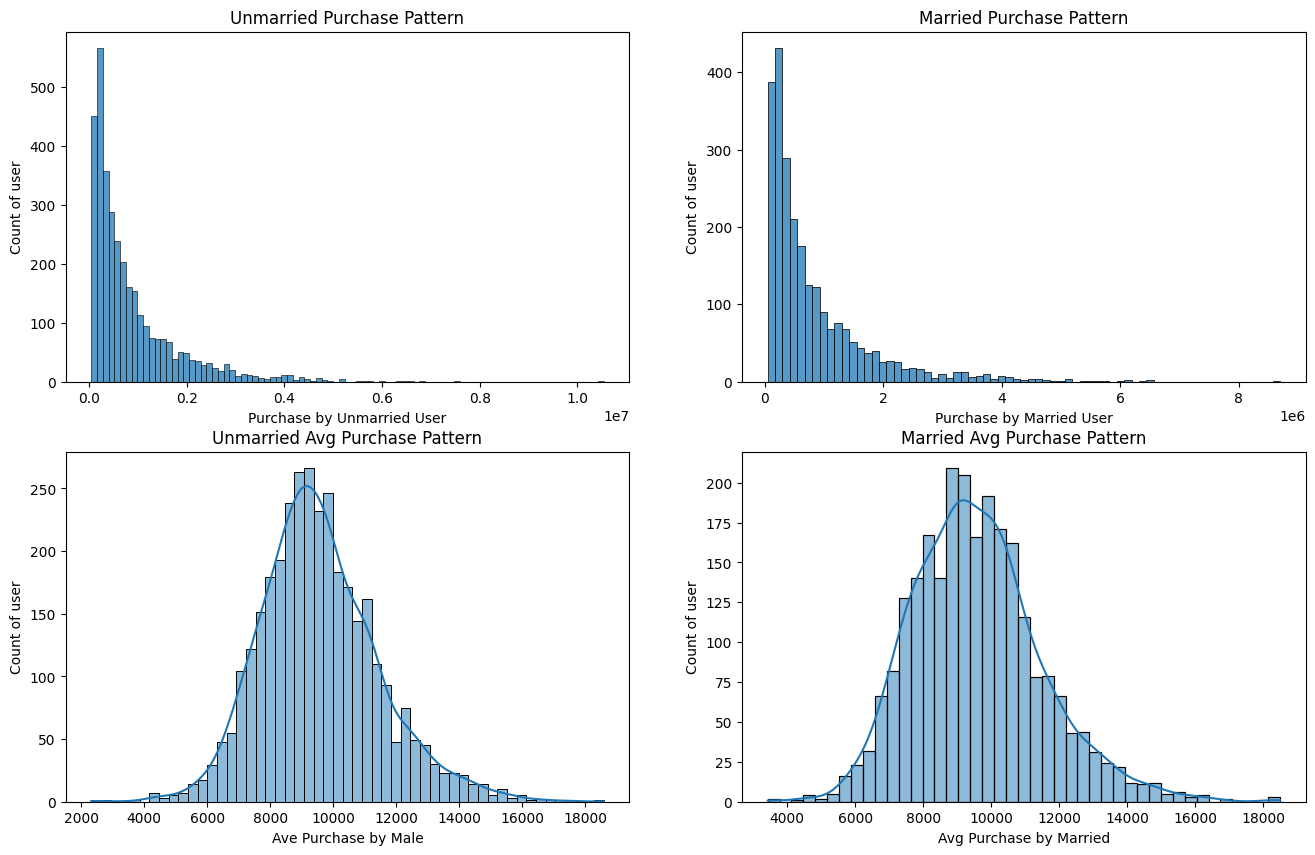

In [ ]:
plt.figure(figsize=(16,10))
umr_data = df_amt_mrt[df_amt_mrt['Marital_Status']=='Unmarried']['sum']
plt.subplot(2,2,1)
sns.histplot(data=umr_data)
plt.xlabel('Purchase by Unmarried User')
plt.ylabel('Count of user')
plt.title("Unmarried Purchase Pattern")

mr_data = df_amt_mrt[df_amt_mrt['Marital_Status']=='Married']['sum']
plt.subplot(2,2,2)
sns.histplot(data=mr_data)
plt.xlabel('Purchase by Married User')
plt.ylabel('Count of user')
plt.title("Married Purchase Pattern")

umr_data_avg = df_amt_mrt[df_amt_mrt['Marital_Status']=='Unmarried']['mean']
plt.subplot(2,2,3)
sns.histplot(data=umr_data_avg,kde=True)
plt.xlabel('Ave Purchase by Male')
plt.ylabel('Count of user')
plt.title("Unmarried Avg Purchase Pattern")

mr_data_avg = df_amt_mrt[df_amt_mrt['Marital_Status']=='Married']['mean']
plt.subplot(2,2,4)
sns.histplot(data=mr_data_avg, kde=True)
plt.xlabel('Avg Purchase by Married')
plt.ylabel('Count of user')
plt.title("Married Avg Purchase Pattern")
plt.show()

***Note: To see all results kindly scroll the result window***

**Key Observation:**

* Both Married and Unmarried customers spending are similar.
* The highest purchase has been made from unmarried user the User_id: '1004277', . And avg spent is also from a unmarried having User Id '1003902'.
* total and Average spent there a mix of both customers.
* Average purchase follwos normal distribution pattern.

**Exploring Probaility Distribution using Control Limit Theorm and Confidance Interval**

Heter we have taken the condition of the estimating Average Purchase Amount per Transaction

In [ ]:
#creating separate data frames by marrige status
df_umr = df_raw[df_raw['Marital_Status'] == 'Unmarried']['Purchase']
df_mr = df_raw[df_raw['Marital_Status'] == 'Married']['Purchase']

In [ ]:
#sample sizes and corresponding plot positions
sample_sizes = [100,300,3000,30000]
#number of samples to be taken from purchase amount
bs_sample_nos = 10000
umr_samples = {}
mr_samples = {}
for i in sample_sizes:
  umr_means = []
  mr_means = []
  for j in range(bs_sample_nos):
    umr_bs_samples = np.random.choice(df_umr,size = i)
    mr_bs_samples = np.random.choice(df_mr,size = i)
    umr_sample_mean = np.mean(umr_bs_samples)
    mr_sample_mean = np.mean(mr_bs_samples)
    umr_means.append(umr_sample_mean)
    mr_means.append(mr_sample_mean)
    umr_samples[f'{i}'] = umr_means
    mr_samples[f'{i}'] = mr_means

In [ ]:
#Creating Samples Data Frame
df_umr_dat= pd.DataFrame(data = umr_samples)
df_mr_dat= pd.DataFrame(data = mr_samples)

In [ ]:
df_umr_dat

,100,300,3000,30000
0,9651.48,9514.990000,9379.456000,9268.128933
1,9681.54,9188.906667,9259.853667,9290.476633
2,8616.49,9132.986667,9268.558000,9320.212167
3,9082.72,8807.150000,9254.562000,9194.542567
4,9334.52,8772.020000,9163.323333,9316.996100
...,...,...,...,...
9995,9230.42,9488.686667,9395.537333,9257.804233
9996,8374.34,9150.723333,9081.491667,9289.488533
9997,8526.96,9286.920000,9212.745667,9299.070167
9998,8362.85,9119.920000,9166.817000,9282.618467


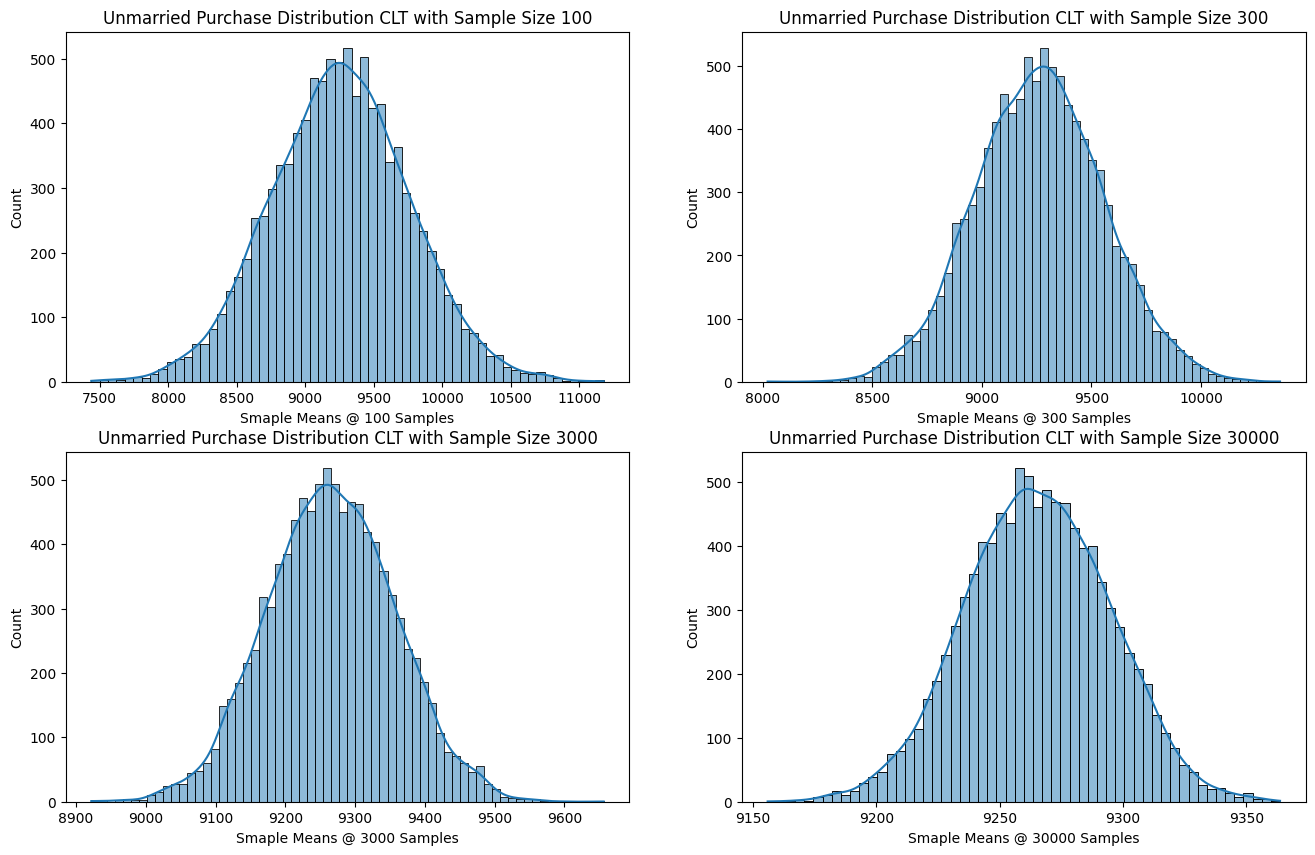

In [ ]:
#Normal Distribution from CLT
df_dat_plt = df_umr_dat
plt_no=1
plt.figure(figsize= (16,10))
for i in df_dat_plt.columns:
  plt.subplot(2,2,plt_no)
  sns.histplot(data=df_dat_plt[i], kde=True)
  plt.title(f'Unmarried Purchase Distribution CLT with Sample Size {i}')
  plt.xlabel(f'Smaple Means @ {i} Samples')
  plt_no+=1

plt.show()


***Note: To see all results kindly scroll the result window***

In [ ]:
#Finding the sample values
df_avd_spet_mr = df_raw.groupby(['Marital_Status'])['Purchase'].mean()
df_avd_spet_mr= df_avd_spet_mr.reset_index()

umr_cust_avg = df_avd_spet_mr.loc[df_avd_spet_mr['Marital_Status']=='Unmarried']['Purchase'].values[0]
mr_cust_avg = df_avd_spet_mr.loc[df_avd_spet_mr['Marital_Status']=='Married']['Purchase'].values[0]
print(f'Unmarried customer average spent amount: {round(umr_cust_avg,2)}')
print(f'Married customer average spent amount: {round(mr_cust_avg,2)}')

Unmarried customer average spent amount: 9265.91
Married customer average spent amount: 9261.17


In [ ]:
dat_tab = {'sample_size':[], 'confi_interval':[],'z_score':[],'pop_smaple':[],'sample_mean':[], 'sample_std':[],'ci_lower_limt':[], 'ci_upper_limt':[],'Range':[]}
umr_ci_tables = pd.DataFrame(data=  dat_tab)
mr_ci_tables = pd.DataFrame(data=  dat_tab)

In [ ]:
df_dat_ci = df_umr_dat
pop_sam = umr_cust_avg
count=0
ci = [90,95,99]
for k in ci:
  for i in df_dat_ci.columns:
    a= int(i)
    z_scr = round(stats.norm.ppf(1-(1-int(k)/100)/2),3)
    s_mean_ci=round(np.mean(df_dat_ci[i]),2)
    s_std_ci=round(pd.Series(df_dat_ci[i]).std(),2)
    UL_ci= round((s_mean_ci + z_scr*s_std_ci),2)
    LL_ci= round((s_mean_ci - z_scr*s_std_ci),2)
    umr_ci_tables.loc[count] = [a,k,('+/- '+str(z_scr)),round(pop_sam,2),s_mean_ci,s_std_ci,LL_ci,UL_ci,(UL_ci - LL_ci)]
    count+=1

print('Confidance Interval Limits and Table for Purchase by Unmarried')
print('-'*50)
umr_ci_tables.sort_values(by='sample_size')

Confidance Interval Limits and Table for Purchase by Unmarried
--------------------------------------------------


,sample_size,confi_interval,z_score,pop_smaple,sample_mean,sample_std,ci_lower_limt,ci_upper_limt,Range
0,100,90,+/- 1.645,9265.91,9257.74,505.49,8426.21,10089.27,1663.06
4,100,95,+/- 1.96,9265.91,9257.74,505.49,8266.98,10248.50,1981.52
8,100,99,+/- 2.576,9265.91,9257.74,505.49,7955.60,10559.88,2604.28
1,300,90,+/- 1.645,9265.91,9263.44,291.57,8783.81,9743.07,959.26
5,300,95,+/- 1.96,9265.91,9263.44,291.57,8691.96,9834.92,1142.96
9,300,99,+/- 2.576,9265.91,9263.44,291.57,8512.36,10014.52,1502.16
2,3000,90,+/- 1.645,9265.91,9265.75,91.33,9115.51,9415.99,300.48
6,3000,95,+/- 1.96,9265.91,9265.75,91.33,9086.74,9444.76,358.02
10,3000,99,+/- 2.576,9265.91,9265.75,91.33,9030.48,9501.02,470.54
3,30000,90,+/- 1.645,9265.91,9265.25,29.23,9217.17,9313.33,96.16


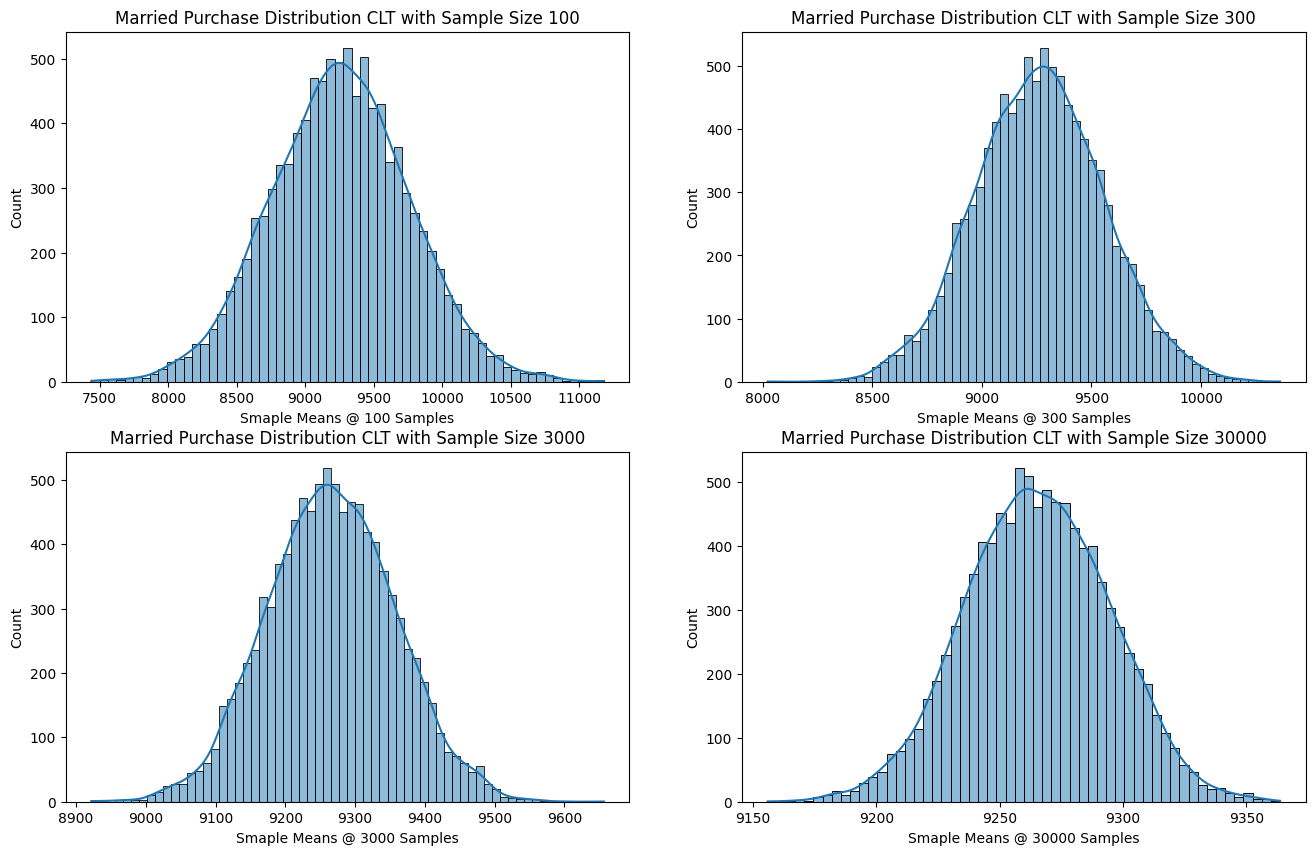

In [ ]:
#Normal Distribution from CLT
df_dat_plt = df_umr_dat
plt_no=1
plt.figure(figsize= (16,10))
for i in df_dat_plt.columns:
  plt.subplot(2,2,plt_no)
  sns.histplot(data=df_dat_plt[i], kde=True)
  plt.title(f'Married Purchase Distribution CLT with Sample Size {i}')
  plt.xlabel(f'Smaple Means @ {i} Samples')
  plt_no+=1

plt.show()


***Note: To see all results kindly scroll the result window***

In [ ]:
df_dat_ci = df_mr_dat
pop_sam = mr_cust_avg
count=0
ci = [90,95,99]
for k in ci:
  for i in df_dat_ci.columns:
    a= int(i)
    z_scr = round(stats.norm.ppf(1-(1-int(k)/100)/2),3)
    s_mean_ci=round(np.mean(df_dat_ci[i]),2)
    s_std_ci=round(pd.Series(df_dat_ci[i]).std(),2)
    UL_ci= round((s_mean_ci + z_scr*s_std_ci),2)
    LL_ci= round((s_mean_ci - z_scr*s_std_ci),2)
    mr_ci_tables.loc[count] = [a,k,('+/- '+str(z_scr)),round(pop_sam,2),s_mean_ci,s_std_ci,LL_ci,UL_ci,(UL_ci - LL_ci)]
    count+=1

print('Confidance Interval Limits and Table for Purchase by Married')
print('-'*50)
mr_ci_tables.sort_values(by='sample_size')

Confidance Interval Limits and Table for Purchase by Married
--------------------------------------------------


,sample_size,confi_interval,z_score,pop_smaple,sample_mean,sample_std,ci_lower_limt,ci_upper_limt,Range
0,100,90,+/- 1.645,9261.17,9268.48,502.35,8442.11,10094.85,1652.74
4,100,95,+/- 1.96,9261.17,9268.48,502.35,8283.87,10253.09,1969.22
8,100,99,+/- 2.576,9261.17,9268.48,502.35,7974.43,10562.53,2588.10
1,300,90,+/- 1.645,9261.17,9262.83,286.78,8791.08,9734.58,943.50
5,300,95,+/- 1.96,9261.17,9262.83,286.78,8700.74,9824.92,1124.18
9,300,99,+/- 2.576,9261.17,9262.83,286.78,8524.08,10001.58,1477.50
2,3000,90,+/- 1.645,9261.17,9260.22,92.49,9108.07,9412.37,304.30
6,3000,95,+/- 1.96,9261.17,9260.22,92.49,9078.94,9441.50,362.56
10,3000,99,+/- 2.576,9261.17,9260.22,92.49,9021.97,9498.47,476.50
3,30000,90,+/- 1.645,9261.17,9261.27,29.00,9213.56,9308.98,95.42


**Key Observations:**

Sample Size
* With increase in sample size, the confidence intervals become narrower and more precise .
* larger sample sizes can provide more reliable insights and estimates.

Confidence Intervals
*  confidence interval overlap for all the sample sizes.
* there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.


Population Average
*  We are confidentlt sugget the various levels at with intervals from above tables. Like, we are 95% confident that the true population average for Unmarried falls between 9,208 and 9,323, and for Married, it falls between 9,205 and 9,318. For more details please refer to tables above.


Both the customers spend equal

* The overlapping confidence intervals of average spending shows  that both married and unmarried customers spend a similar amount per transaction .
* There is a resemblance in spending behavior between the two groups.

-----------
#c. Age vs Purchase


**Exploring Data Distributuion, mean, median and Outliners**

In [ ]:
df_raw.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
# Analysing Purachse with Age
col = 'Age'
df_two = df_raw.groupby(col)['Purchase'].agg(['sum','count']).reset_index()
df_two['sum(mil)'] = round(df_two['sum'] / 10**6,2)
df_two['%_sum'] = round(df_two['sum']/df_two['sum'].sum(),3)
df_two['per_purchase'] = round(df_two['sum']/df_two['count'])
df_two

,Age,sum,count,sum(mil),%_sum,per_purchase
0,0-17,134913183,15102,134.91,0.026,8933.0
1,18-25,913848675,99660,913.85,0.179,9170.0
2,26-35,2031770578,219587,2031.77,0.399,9253.0
3,36-45,1026569884,110013,1026.57,0.201,9331.0
4,46-50,420843403,45701,420.84,0.083,9209.0
5,51-55,367099644,38501,367.10,0.072,9535.0
6,55+,200767375,21504,200.77,0.039,9336.0


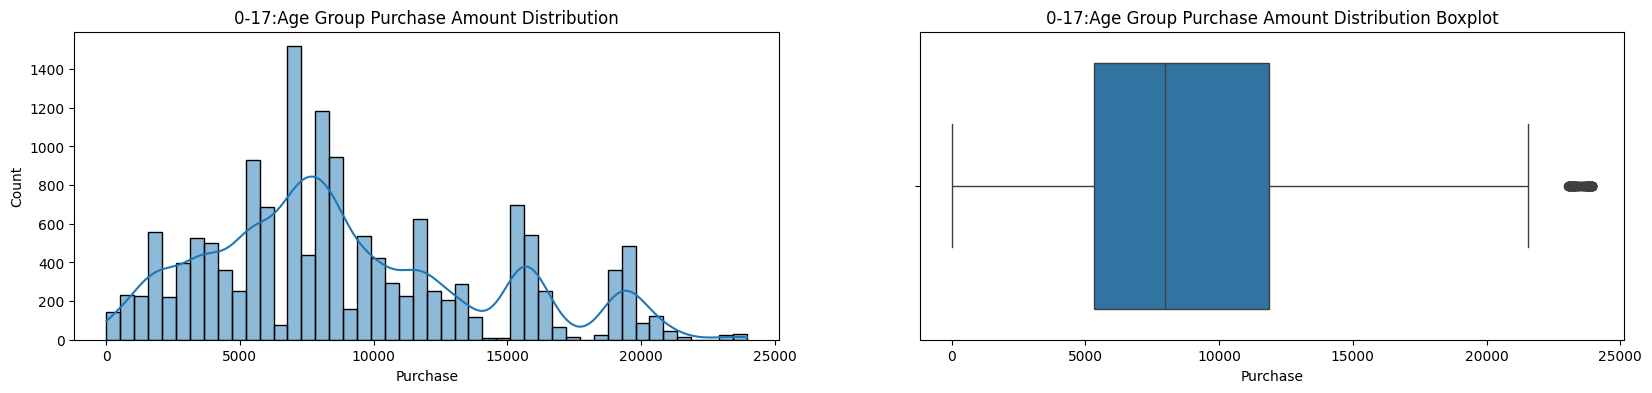

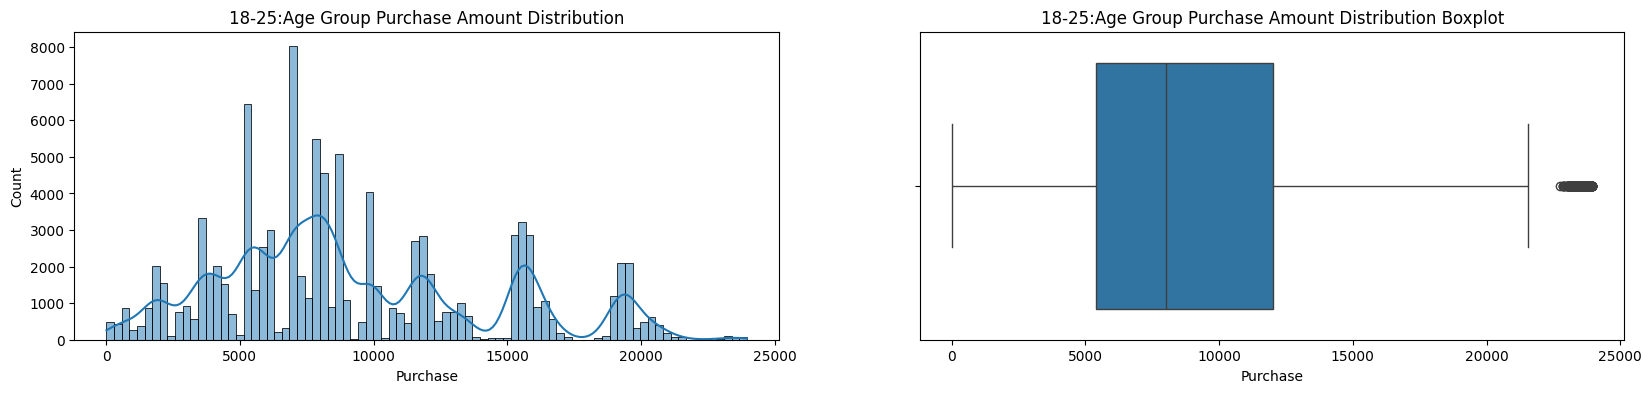

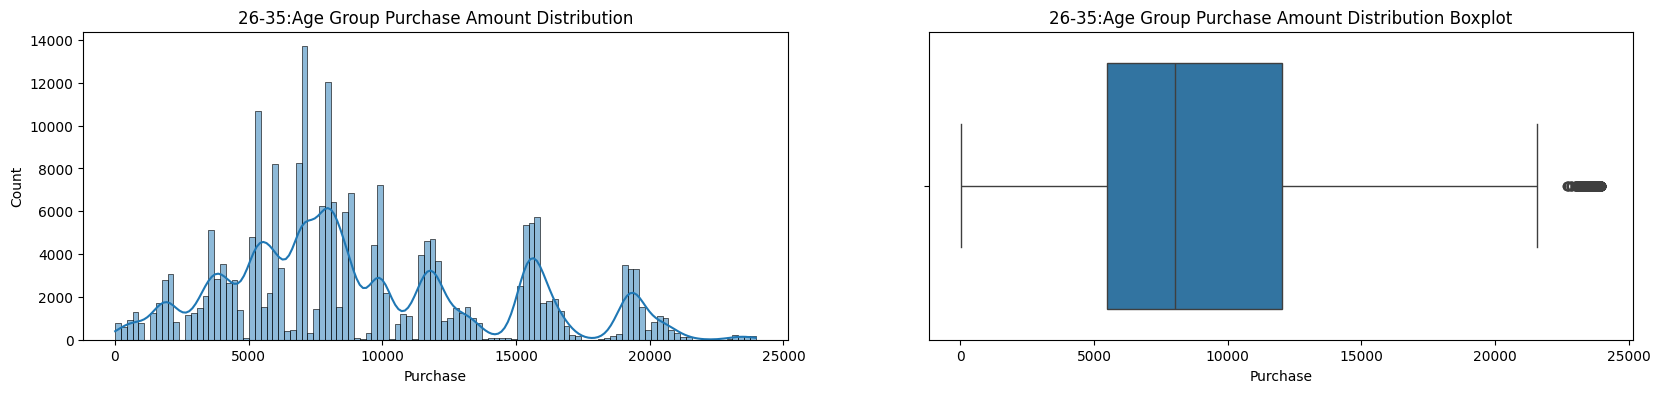

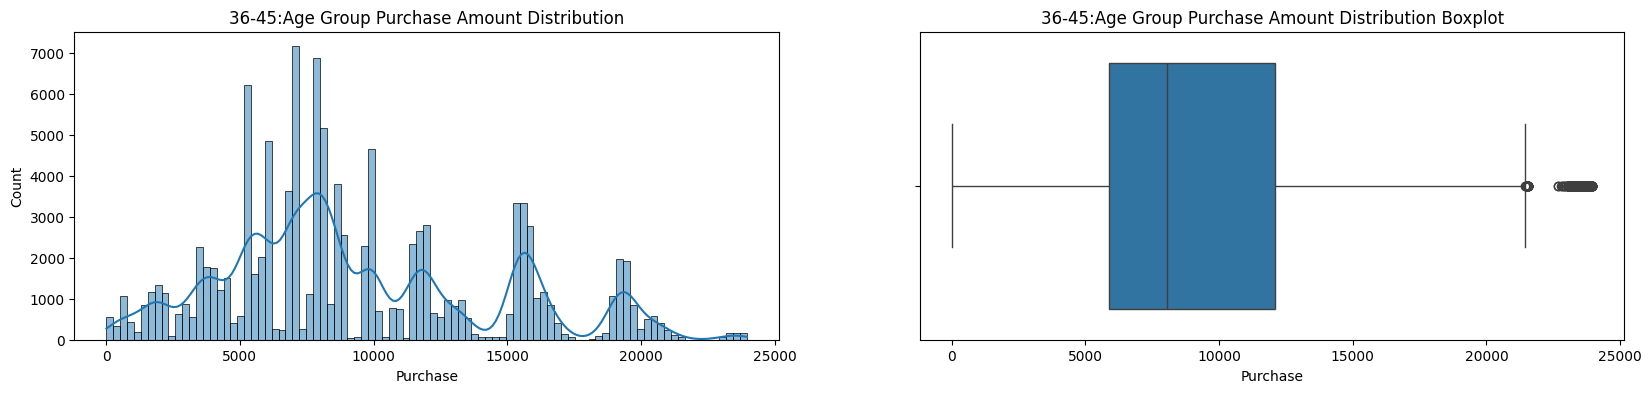

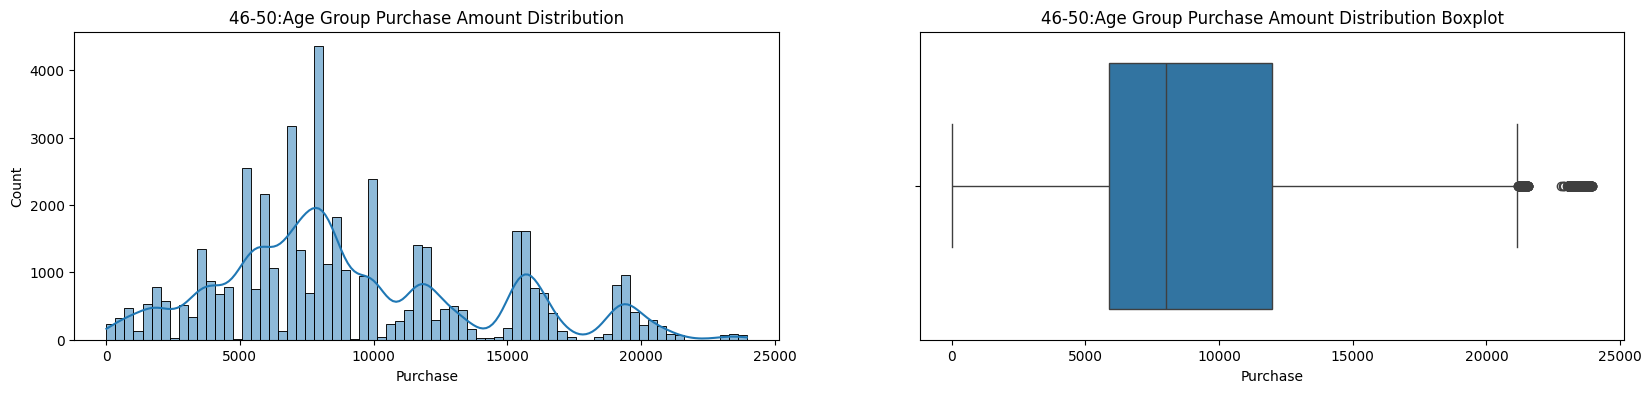

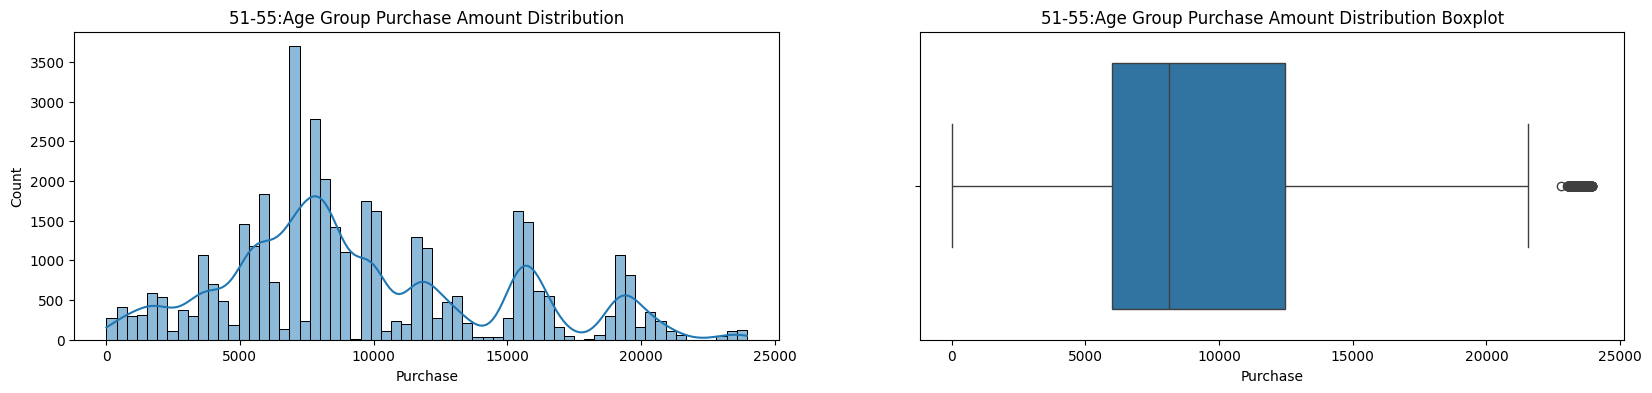

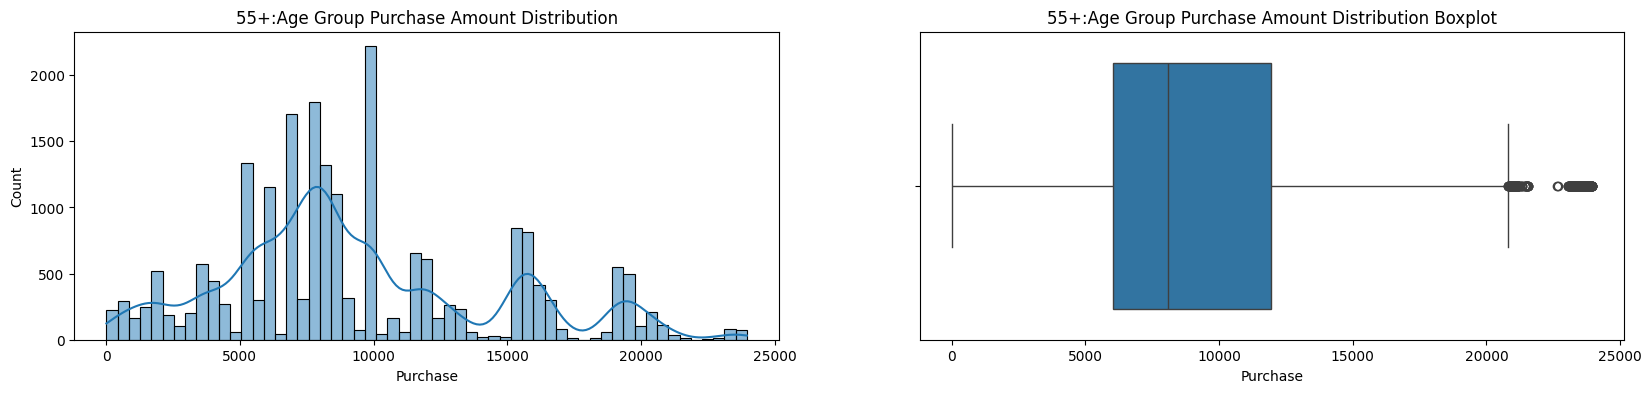

In [ ]:
col = 'Age'
for i in df_two['Age'].unique():
  plt.figure(figsize=(20,4))
  plt.subplot(1,2,1)
  plt.title(f"{i}:Age Group Purchase Amount Distribution")
  sns.histplot(data=df_raw[df_raw[col]==i], x='Purchase', kde=True)
  plt.subplot(1,2,2)
  plt.title(f"{i}:Age Group Purchase Amount Distribution Boxplot")
  sns.boxplot(data=df_raw[df_raw[col]==i], x='Purchase')
  plt.show()

***Note: To see all results kindly scroll the result window***

**Key Observation:**

* Age group between 26 - 45 accounts to almost 60% of total sales on Walmart's Black Friday sales.
* Age group 0-17 has the lowest sales percentage (2.6%) , which is expected as they may not have as much purchasing power.
* 0-17, and 18-25 are potntial future customers for attracting them  special offers could be beneficial, for building customer loyalty as they age.

* there is not a significant difference in per purchase spending among the age groups, the 51-55 age group has a relatively low sales percentage (7.2%) but they have the highest per purchase spending at 9535. scpecial offers could made to attract and retain this high-spending.

* As seen above, the purchase amount for all age groups is not normally distributed .

In [ ]:
dat_tab_sum = {'Age_Group':[],'Mean':[], 'Median':[],'Q1':[],'Q3':[],'IQR':[], 'Min':[], 'Max':[],'Range':[], 'Outliers_nos':[], 'Outliers_percentage':[]}
Age_summ_tables = pd.DataFrame(data=  dat_tab_sum)


In [ ]:
del col
col = 'Age'
loca = 0
for i in df_two[col].unique():
  df_para = df_raw[df_raw[col]==i]['Purchase'].astype(float) #only to assure the data type not chaned in the process
  mean_v = df_para.mean().round(2)
  median_v = df_para.median()
  para_q1 = np.percentile(df_para,25)
  para_q3 = np.percentile(df_para,75)
  para_IQR = para_q3 - para_q1
  paraMin = para_q1 - 1.5*para_IQR
  paraMax = para_q3 + 1.5*para_IQR
  Ran_v = paraMax-paraMin
  paraOut = df_para[(df_para < paraMin)|(df_para > paraMax)]
  out_v = len(paraOut.values)
  outp_v = round(len(paraOut.values)/len(df_para)*100,2)
  Age_summ_tables.loc[loca] = [i, mean_v,median_v,para_q1,para_q3,para_IQR,paraMin,paraMax,Ran_v,out_v,outp_v]
  loca+=1

In [ ]:
print('Age Group wise Distribution Mean, Median and Outliers Details')
Age_summ_tables

Age Group wise Distribution Mean, Median and Outliers Details


,Age_Group,Mean,Median,Q1,Q3,IQR,Min,Max,Range,Outliers_nos,Outliers_percentage
0,0-17,8933.46,7986.0,5328.0,11874.0,6546.0,-4491.0,21693.0,26184.0,56,0.37
1,18-25,9169.66,8027.0,5415.0,12028.0,6613.0,-4504.5,21947.5,26452.0,262,0.26
2,26-35,9252.69,8030.0,5475.0,12047.0,6572.0,-4383.0,21905.0,26288.0,816,0.37
3,36-45,9331.35,8061.0,5876.0,12107.0,6231.0,-3470.5,21453.5,24924.0,586,0.53
4,46-50,9208.63,8036.0,5888.0,11997.0,6109.0,-3275.5,21160.5,24436.0,303,0.66
5,51-55,9534.81,8130.0,6017.0,12462.0,6445.0,-3650.5,22129.5,25780.0,278,0.72
6,55+,9336.28,8105.5,6018.0,11932.0,5914.0,-2853.0,20803.0,23656.0,250,1.16


--------
To look the unique Customer Behaviour will go by the details of the User ID and Marital_Status vs Purchase

In [ ]:
df_amt_age = df_raw.groupby(['User_ID', 'Age'])['Purchase'].agg(['sum','mean'])
df_amt_age = df_amt_age.dropna(axis=0,how='any').reset_index()
print(f"Top 10 purchase user wise from Age Groups\n {df_amt_age.sort_values(by='sum', ascending=False).head(10)}")
print('-'*60)
print(f"Top 10 Average purchase wise from Age Groups\n {df_amt_age.sort_values(by='mean', ascending=False).head(10)}")

Top 10 purchase user wise from Age Groups
       User_ID    Age       sum          mean
4166  1004277  36-45  10536909  10762.930541
1634  1001680  26-35   8699596   8479.138402
2831  1002909  26-35   7577756  10553.977716
1885  1001941  36-45   6817493   7591.863029
416   1000424  26-35   6573609   9472.059078
4335  1004448  26-35   6566245  11419.556522
5683  1005831  26-35   6512433   8957.954608
981   1001015  36-45   6511314   8799.072973
3297  1003391  18-25   6477160   9279.598854
1142  1001181  36-45   6387961   7410.627610
------------------------------------------------------------
Top 10 Average purchase wise from Age Groups
       User_ID    Age      sum          mean
3801  1003902  26-35  1746322  18577.893617
4943  1005069    55+   332823  18490.166667
5849  1005999  26-35   330227  18345.944444
1307  1001349  51-55   417743  18162.739130
3367  1003461  36-45   350174  17508.700000
98    1000101  18-25  1138265  17246.439394
2902  1002983  18-25   520509  16790.612903
584

In [ ]:
# Age Group wise Count
Age_wise_count=df_amt_age['Age'].value_counts()
print(f'Total count : {Age_wise_count.sum()}')
print(f"Age wise count : \n{Age_wise_count.sort_index()}")

Total count : 5891
Age wise count : 
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: Age, dtype: int64


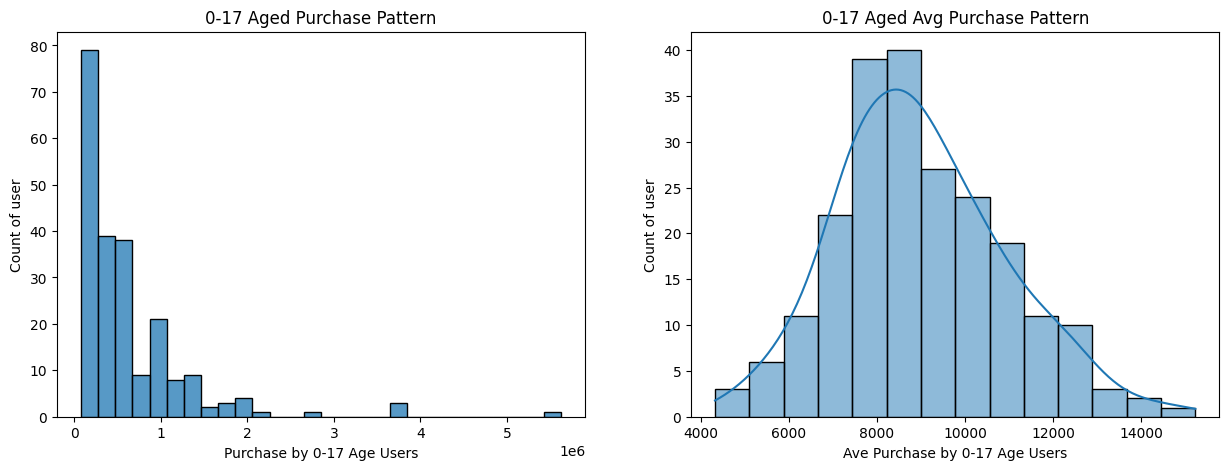

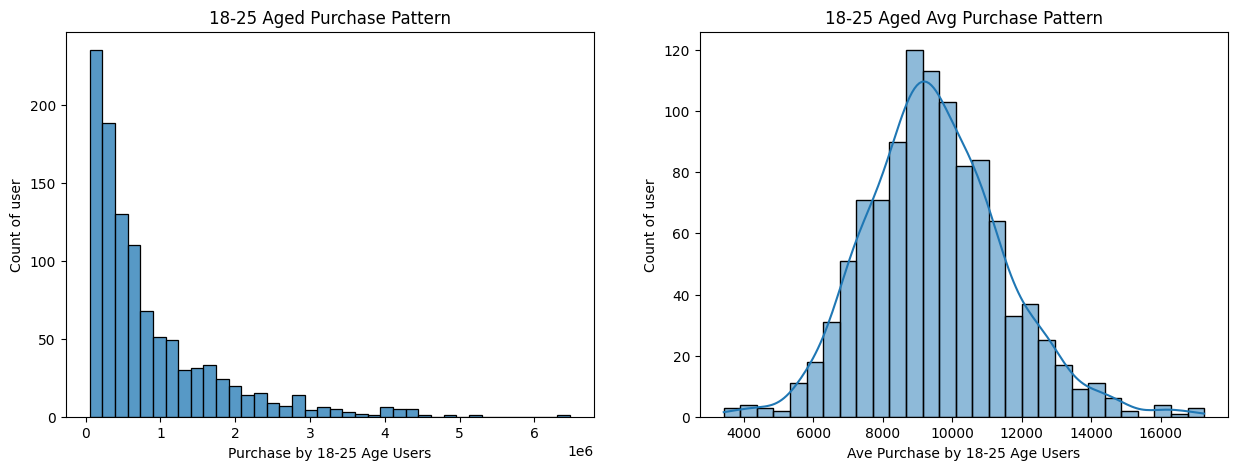

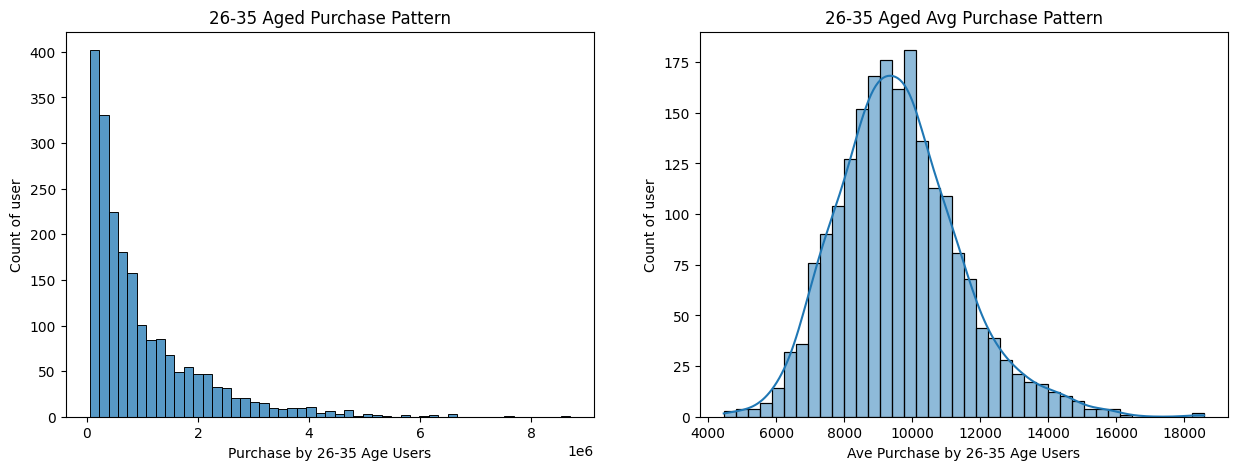

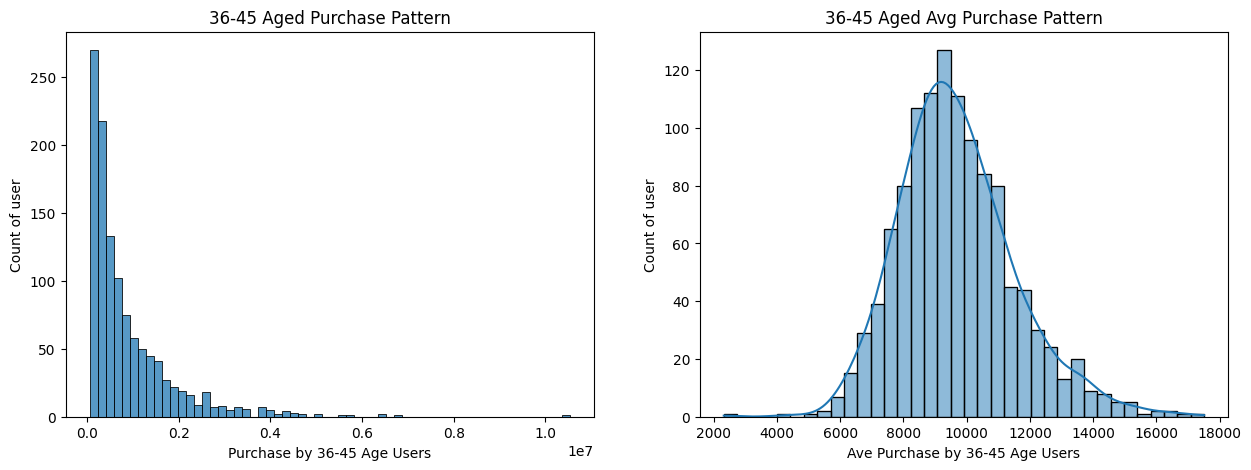

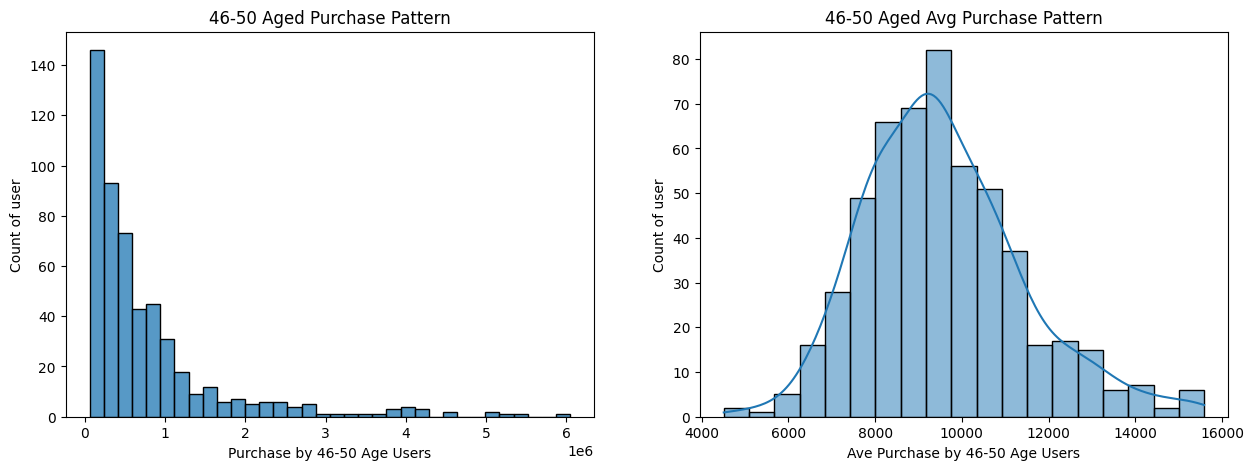

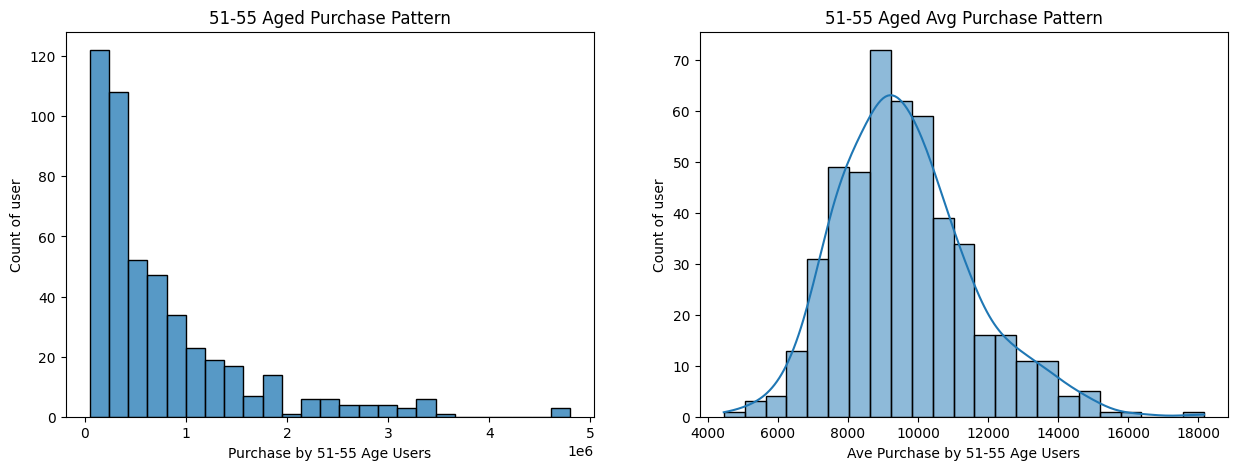

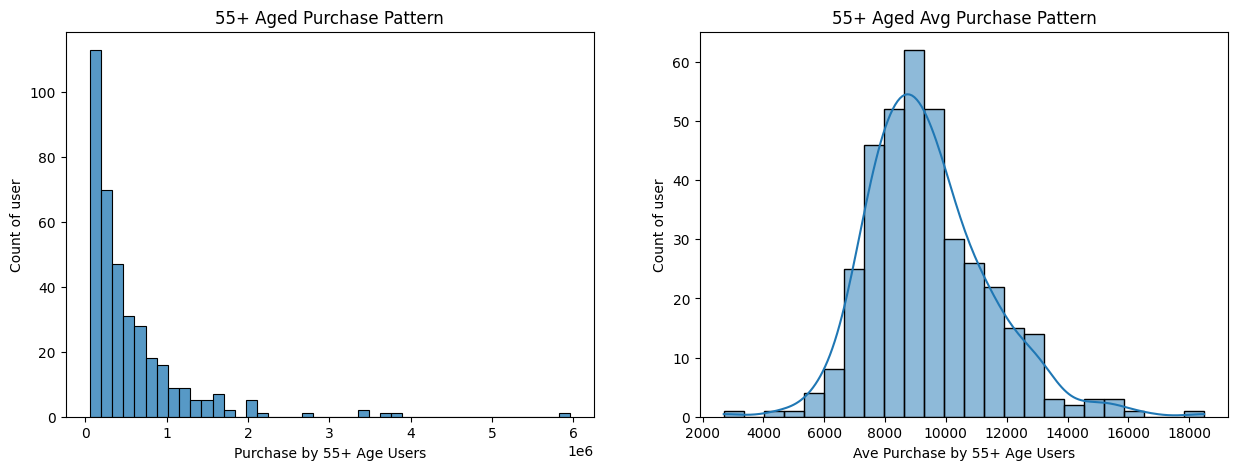

In [ ]:
col = 'Age'
for i in df_two['Age'].unique():
  plt.figure(figsize=(15,5))
  age_l_data = df_amt_age[df_amt_age[col]==i]['sum']
  plt.subplot(1,2,1)
  sns.histplot(data=age_l_data)
  plt.xlabel(f'Purchase by {i} Age Users')
  plt.ylabel('Count of user')
  plt.title(f"{i} Aged Purchase Pattern")

  age_l_data_avg = df_amt_age[df_amt_age[col]==i]['mean']
  plt.subplot(1,2,2)
  sns.histplot(data=age_l_data_avg,kde=True)
  plt.xlabel(f'Ave Purchase by {i} Age Users')
  plt.ylabel('Count of user')
  plt.title(f"{i} Aged Avg Purchase Pattern")
  plt.show()

***Note: To see all results kindly scroll the result window***

**Key Observation:**

* total coustomer spending has a spread over 26-45 age.
* total average spending there a mix of both customers except 0-17 age group, which do not have purchase power
* Average purchase follwos normal distribution pattern.

**Exploring Probaility Distribution using Control Limit Theorm and Confidance Interval**

Heter we have taken the condition of the estimating Average Purchase Amount per Transaction

In [ ]:
del col
col = 'Age'
loca = 0
sample_sizes = [100,300,3000,30000]
bs_sample_nos = 10000
age_samples = {}
for k in df_two[col].unique():
  df_age_s_m = df_raw[df_raw[col] == k]['Purchase']
  for i in sample_sizes:
    age_means = []
    for j in range(bs_sample_nos):
      age_bs_samples = np.random.choice(df_age_s_m, size = i)
      age_sample_mean = np.mean(age_bs_samples)
      age_means.append(age_sample_mean)
      age_samples[f'{k}_Age_{i}'] = age_means

df_age_dat= pd.DataFrame(data = age_samples)
print('Samples Distribution data by Age group and Sample Size')
df_age_dat

Samples Distribution data by Age group and Sample Size


,0-17_Age_100,0-17_Age_300,0-17_Age_3000,0-17_Age_30000,18-25_Age_100,18-25_Age_300,18-25_Age_3000,18-25_Age_30000,26-35_Age_100,26-35_Age_300,...,46-50_Age_3000,46-50_Age_30000,51-55_Age_100,51-55_Age_300,51-55_Age_3000,51-55_Age_30000,55+_Age_100,55+_Age_300,55+_Age_3000,55+_Age_30000
0,9642.50,9223.536667,8978.220667,8926.471700,9351.67,9522.183333,9038.654000,9198.246433,10071.02,9133.396667,...,9177.972667,9201.273267,8786.23,10150.490000,9632.812000,9548.033033,8857.05,9369.360000,9270.559333,9323.092300
1,8334.93,9281.503333,8775.493667,8950.630667,9164.17,9476.216667,9223.488333,9148.681833,9597.27,9404.290000,...,9244.933000,9169.305000,8872.24,10127.096667,9629.892000,9521.786167,9517.04,9247.106667,9306.173000,9344.667633
2,9504.63,8604.333333,9075.448000,8951.081233,8283.39,8694.206667,9265.402333,9165.118133,9959.93,9239.813333,...,9091.353667,9214.311467,9365.89,9495.013333,9507.340667,9530.044033,10588.44,8728.260000,9278.693333,9282.868800
3,9282.02,8702.376667,9038.781667,8930.537867,9671.14,8888.413333,9148.524000,9172.677800,8775.46,9223.680000,...,9197.499000,9229.180533,10382.52,9266.463333,9425.051667,9514.510100,10375.54,9256.773333,9368.462667,9329.798000
4,9223.91,9182.276667,8926.498000,8937.047533,9568.83,8859.740000,9249.694667,9190.253367,9352.10,9232.430000,...,9207.305333,9177.671233,9656.59,9376.433333,9558.027333,9550.588333,9119.00,9449.446667,9244.508000,9328.423633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9371.37,8933.123333,8987.418333,8909.286533,9379.93,9156.920000,9257.604000,9234.179333,10087.72,9102.320000,...,9021.692000,9196.679000,9105.85,9450.386667,9542.263000,9552.664667,9055.63,9376.896667,9340.079333,9367.665900
9996,8859.22,8893.793333,8762.603667,8875.230933,8561.32,9639.210000,9165.788000,9168.732267,9561.19,9575.120000,...,9220.657667,9232.297833,9456.21,10044.513333,9518.503000,9541.909167,9005.12,9466.193333,9341.499333,9296.721400
9997,8457.58,8883.800000,8933.850000,8953.487900,9218.63,9017.753333,9169.732667,9224.075200,10776.67,8871.180000,...,9345.568667,9207.264133,8346.08,9294.183333,9603.736000,9545.333533,9110.50,8784.420000,9167.392667,9347.518233
9998,8662.64,8746.800000,8887.054333,8962.643100,9918.88,9491.550000,9236.825000,9200.855700,8269.47,9471.790000,...,9258.004333,9217.727733,9663.36,9926.763333,9581.600333,9493.677967,9742.30,9367.470000,9428.526333,9340.077333


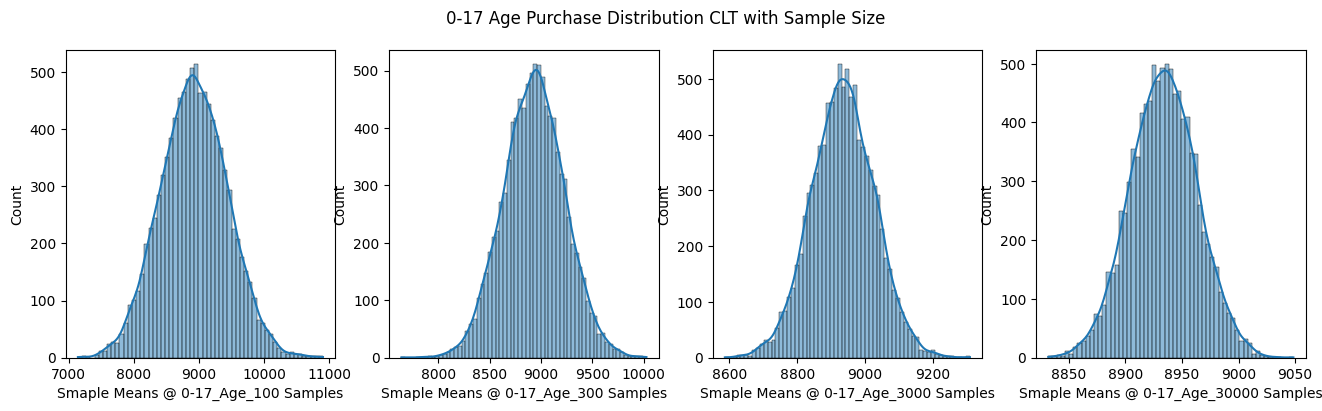

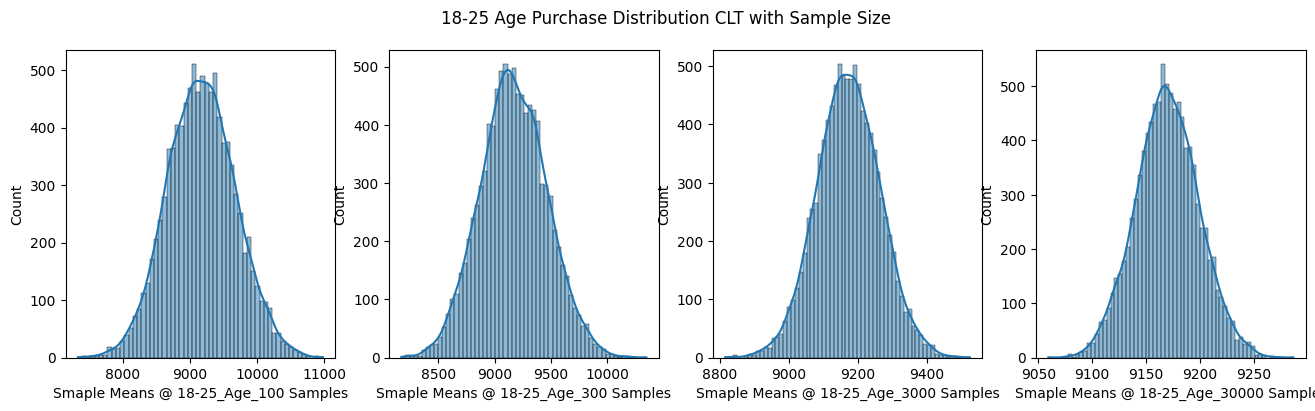

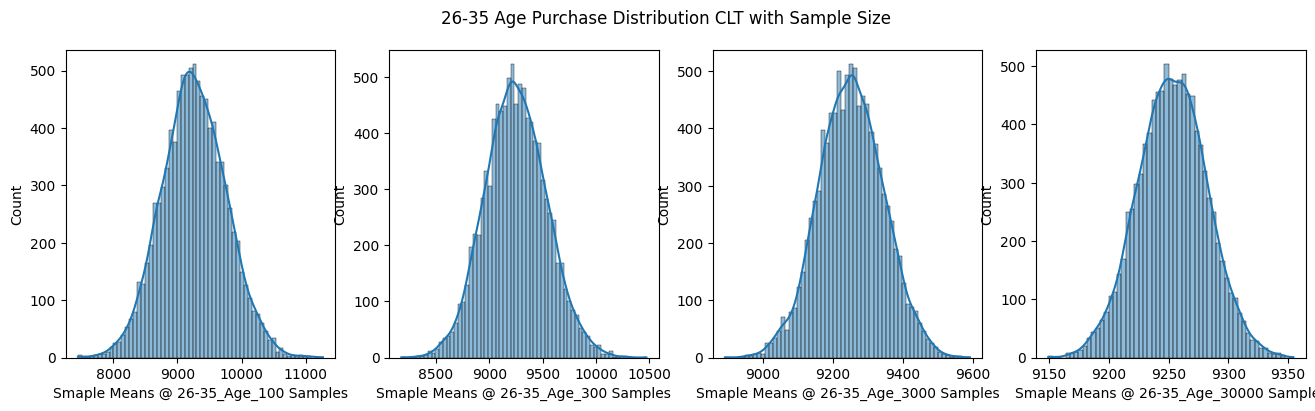

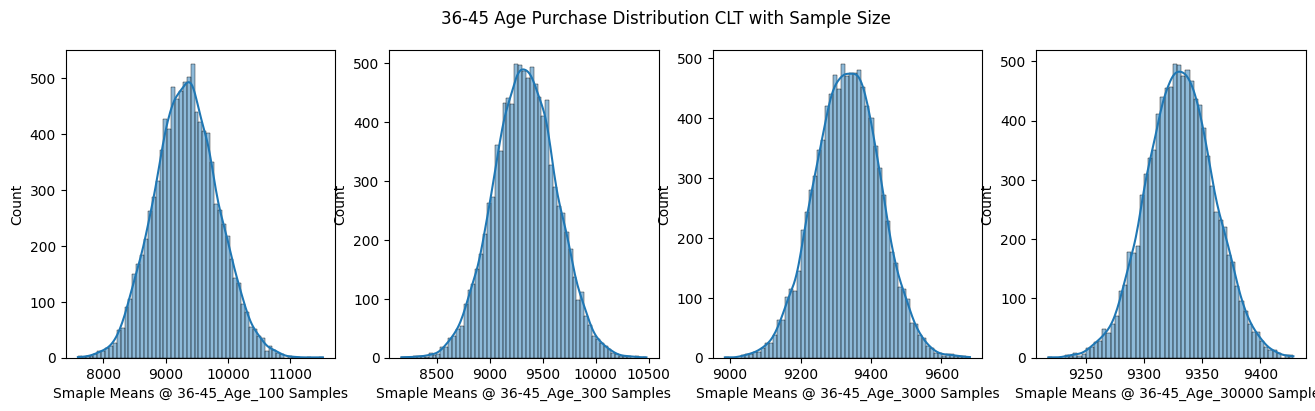

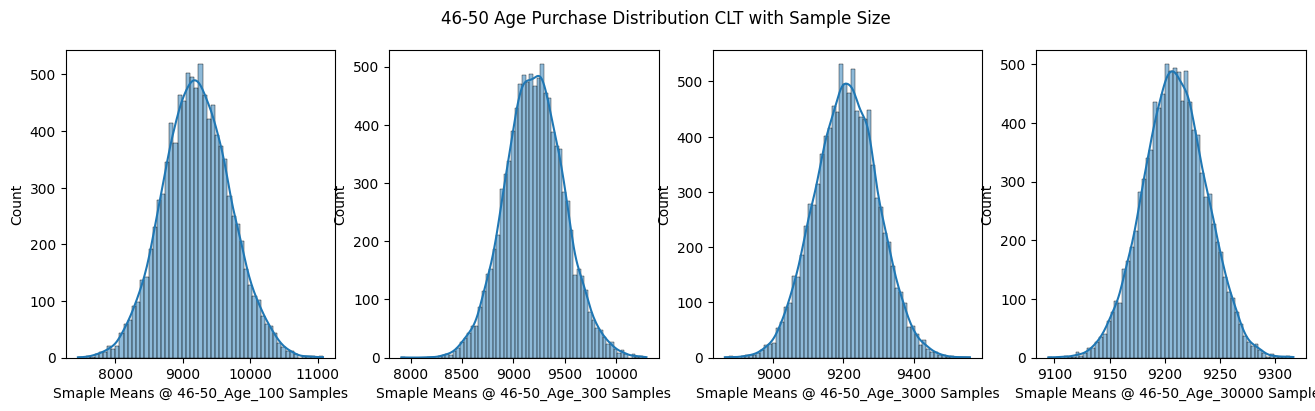

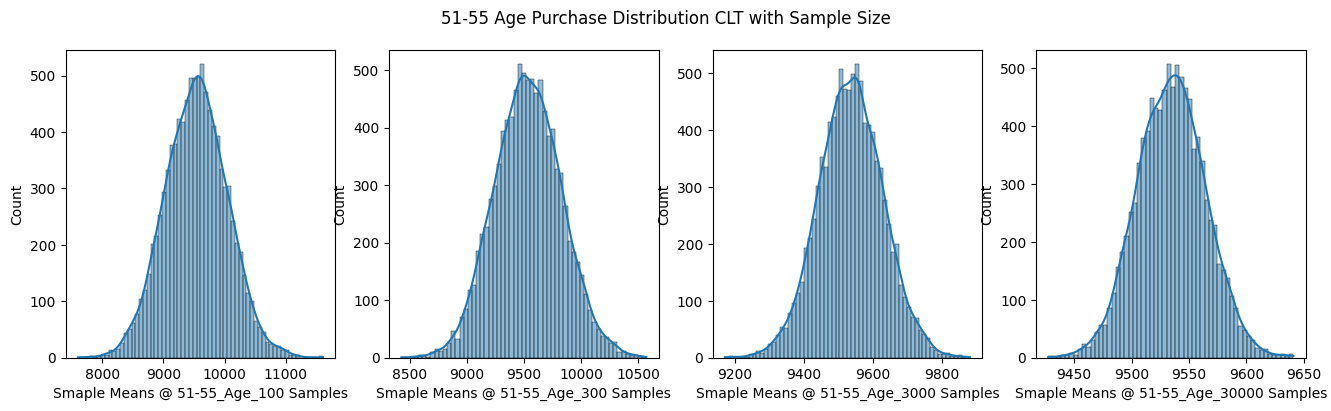

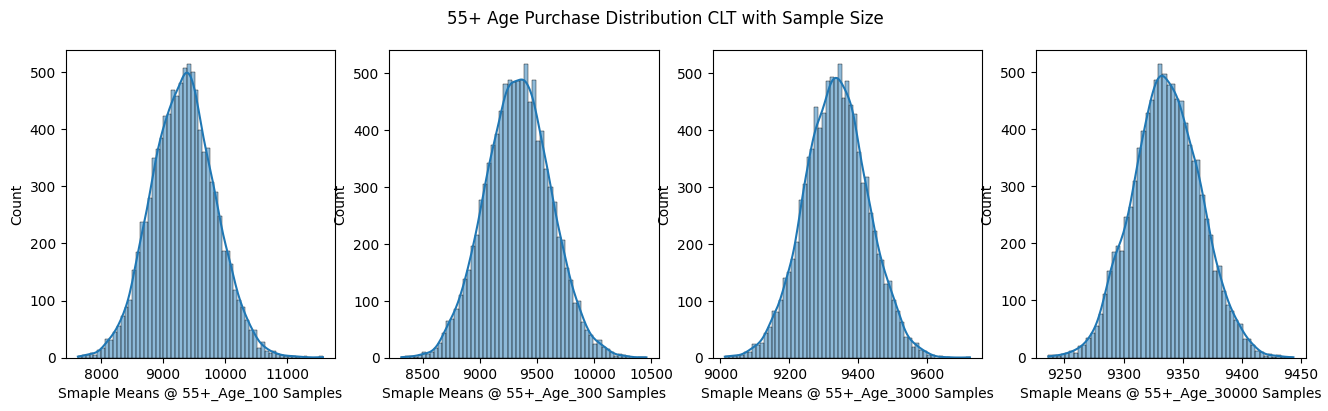

In [ ]:
#Normal Distribution from CLT
df_dat_plt = df_age_dat
for k in df_two[col].unique():
  fig = plt.figure(figsize= (16,4))
  fig.suptitle(f'{k} Age Purchase Distribution CLT with Sample Size')
  plt_no=1
  for i in df_dat_plt.columns:
    a,b = str(i).split("_Age_")
    if a == k:
      plt.subplot(1,4,plt_no)
      sns.histplot(data=df_dat_plt[i], kde=True)
      plt.xlabel(f'Smaple Means @ {i} Samples')
      plt_no+=1
  plt.show()


***Note: To see all results kindly scroll the result window***

In [ ]:
df_age_dat

,0-17_Age_100,0-17_Age_300,0-17_Age_3000,0-17_Age_30000,18-25_Age_100,18-25_Age_300,18-25_Age_3000,18-25_Age_30000,26-35_Age_100,26-35_Age_300,...,46-50_Age_3000,46-50_Age_30000,51-55_Age_100,51-55_Age_300,51-55_Age_3000,51-55_Age_30000,55+_Age_100,55+_Age_300,55+_Age_3000,55+_Age_30000
0,9642.50,9223.536667,8978.220667,8926.471700,9351.67,9522.183333,9038.654000,9198.246433,10071.02,9133.396667,...,9177.972667,9201.273267,8786.23,10150.490000,9632.812000,9548.033033,8857.05,9369.360000,9270.559333,9323.092300
1,8334.93,9281.503333,8775.493667,8950.630667,9164.17,9476.216667,9223.488333,9148.681833,9597.27,9404.290000,...,9244.933000,9169.305000,8872.24,10127.096667,9629.892000,9521.786167,9517.04,9247.106667,9306.173000,9344.667633
2,9504.63,8604.333333,9075.448000,8951.081233,8283.39,8694.206667,9265.402333,9165.118133,9959.93,9239.813333,...,9091.353667,9214.311467,9365.89,9495.013333,9507.340667,9530.044033,10588.44,8728.260000,9278.693333,9282.868800
3,9282.02,8702.376667,9038.781667,8930.537867,9671.14,8888.413333,9148.524000,9172.677800,8775.46,9223.680000,...,9197.499000,9229.180533,10382.52,9266.463333,9425.051667,9514.510100,10375.54,9256.773333,9368.462667,9329.798000
4,9223.91,9182.276667,8926.498000,8937.047533,9568.83,8859.740000,9249.694667,9190.253367,9352.10,9232.430000,...,9207.305333,9177.671233,9656.59,9376.433333,9558.027333,9550.588333,9119.00,9449.446667,9244.508000,9328.423633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9371.37,8933.123333,8987.418333,8909.286533,9379.93,9156.920000,9257.604000,9234.179333,10087.72,9102.320000,...,9021.692000,9196.679000,9105.85,9450.386667,9542.263000,9552.664667,9055.63,9376.896667,9340.079333,9367.665900
9996,8859.22,8893.793333,8762.603667,8875.230933,8561.32,9639.210000,9165.788000,9168.732267,9561.19,9575.120000,...,9220.657667,9232.297833,9456.21,10044.513333,9518.503000,9541.909167,9005.12,9466.193333,9341.499333,9296.721400
9997,8457.58,8883.800000,8933.850000,8953.487900,9218.63,9017.753333,9169.732667,9224.075200,10776.67,8871.180000,...,9345.568667,9207.264133,8346.08,9294.183333,9603.736000,9545.333533,9110.50,8784.420000,9167.392667,9347.518233
9998,8662.64,8746.800000,8887.054333,8962.643100,9918.88,9491.550000,9236.825000,9200.855700,8269.47,9471.790000,...,9258.004333,9217.727733,9663.36,9926.763333,9581.600333,9493.677967,9742.30,9367.470000,9428.526333,9340.077333


In [ ]:
del col

df_avd_spet_age = df_raw.groupby(['Age'])['Purchase'].mean()
df_avd_spet_age = df_avd_spet_age.reset_index()

col = 'Age'
count = 0
df_dat_ci = df_age_dat
dat_tab_age = {'Age_Group':[],'sample_size':[], 'confi_interval':[],'z_score':[],'pop_smaple':[],'sample_mean':[], 'sample_std':[],'ci_lower_limt':[], 'ci_upper_limt':[], 'Range':[]}
age_ci_tables = pd.DataFrame(data=  dat_tab_age)
ci = [90,95,99]
for l in df_avd_spet_age[col].unique():
  age_cust_avg = df_avd_spet_age.loc[df_avd_spet_age[col]==l]['Purchase'].values[0]
  pop_sam = age_cust_avg
  for k in ci:
    for i in df_dat_ci.columns:
      c,b= str(i).split("_Age_")
      if l == c:
        a= int(b)
        z_scr = round(stats.norm.ppf(1-(1-int(k)/100)/2),3)
        s_mean_ci=round(np.mean(df_dat_ci[i]),2)
        s_std_ci=round(pd.Series(df_dat_ci[i]).std(),2)
        UL_ci= round((s_mean_ci + z_scr*s_std_ci),2)
        LL_ci= round((s_mean_ci - z_scr*s_std_ci),2)
        age_ci_tables.loc[count] = [l,a,k,('+/- '+str(z_scr)),round(pop_sam,2),s_mean_ci,s_std_ci,LL_ci,UL_ci,(UL_ci - LL_ci)]
        count+=1

print('-'*50)
for i in age_ci_tables['Age_Group'].unique():
  print(f'Confidance Interval Limits and Table for Purchase by Age Group of {i}')
  print('-'*50)
  print(age_ci_tables[age_ci_tables['Age_Group']==i].sort_values(by=['Age_Group','sample_size'],ignore_index=True).T)
  print('-'*50)
  print('\n')

--------------------------------------------------
Confidance Interval Limits and Table for Purchase by Age Group of 0-17
--------------------------------------------------
                       0         1          2          3         4   \
Age_Group            0-17      0-17       0-17       0-17      0-17   
sample_size           100       100        100        300       300   
confi_interval         90        95         99         90        95   
z_score         +/- 1.645  +/- 1.96  +/- 2.576  +/- 1.645  +/- 1.96   
pop_smaple        8933.46   8933.46    8933.46    8933.46   8933.46   
sample_mean       8927.43   8927.43    8927.43    8933.89   8933.89   
sample_std         512.94    512.94     512.94     296.17    296.17   
ci_lower_limt     8083.64   7922.07     7606.1    8446.69    8353.4   
ci_upper_limt     9771.22   9932.79   10248.76    9421.09   9514.38   
Range             1687.58   2010.72    2642.66      974.4   1160.98   

                       5          6         7

***Note: To see all results kindly scroll the result window***

**Key Observations:**

Sample Size
* With increase in sample size, the confidence
intervals become narrower and more precise .
* larger sample sizes can provide more reliable insights and estimates.


Confidence Intervals and customer spending patterns
* the confidence interval overlap for some of the age groups.
* 0 - 17 -age group customers have the lowest spending per transaction
* 18 - 25, 26 - 35, 46 - 50 - Age group Customers have overlapping confidence intervals shows similar buying characteristics
* 36 - 45, 55+ - Customers in these age groups have overlapping shows similar spending patterns
* 51 - 55 - Customers in this age group have the highest spending per transaction


Population Average
*  We are confidentlt sugget the various levels at with intervals from above tables. Like We are 95% confident that the true population average for following age groups falls between the below range -
  - 0 - 17 =  8,876 to 8,992
  - 18 - 25 =  9,112 to 9,227
  - 26 - 35 = 9,197 to 9,310
  - 36 - 45 = 9,274 to 9,388
  - 46 - 50 = 9,152 to 9,265
  - 51 - 55 = 9,476 to 9,593
  - 55+ = 9,279 to 9,393



# **Some Recommendations and actionable insights.**

* Male customers account has significant portion of Black Friday sales and tend to spend more on average than females, Walmart should make marketing strategies and product offerings to incentivize higher spending among males while ensuring competitive pricing for female-oriented products.

* Unmarried customers spend more money compared to married customers. So the company should focus on retaining unmarried customers and getting more unmarried customers.

* Majority of sales is from Age groups between 26- 45, Walmart should specifically look after the preferences and needs of this groups. This may include offering exclusive deals on products that are popular among this age group.

* Customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs as strategic investments to appeal the age group to convert them as loyal customer.

* Customers in the 18 - 25, 26 - 35, & 46 - 50 age groups have similar buying patterns, and also the same has been observed in the 36 - 45 and 55+ Age groups, product selection can be optimized, as per the preferences of these age groups.

* Highest spending per transaction is from customers aged 51 - 55, Walmart should offer them exclusive pre-sale access, special discounts or personalized product recommendations. Special locality programs may also be introduced to reward and retain customers in the 51 - 55 age group. This will also help to encourage other age group customers.

* Most customers purchasing are new in the city about 50% are staying from 0-1 years in the city. Products related to those may be promoted or advertised.

* Product Category: 5, 1, and 8 have the highest purchasing. products in these categories are liked more by customers. Further 11, 2, and 6, 3 have almost close competition in purchasing. The company can focus on selling more of these category products.

* Customers living in City_Category C spend more money than other customers living in B or A. Selling more products in City Category C will help the company increase sales.

* Walmart should go for a follow-up and feedback program with customers who made purchases by sending follow-up emails or offers for related products After Black Friday. This will improve the experience and can help increase customer retention and encourage repeat business in special seasons and otherwise.







-----------

Thanks

Tushar Shrivastav

---------